# Στοιχεία Ομάδας
Αρ. Ομάδας: $01$ <br>
Μαρία Παναγιώτου, $03116703$ <br>
Κωνσταντίνος Αλεξάνδρου, $03116708$ <br>
Ματθαίος Φικάρδος, $03116703$ <br>

# Μικρό Dataset (Connectionist Bench (Sonar, Mines vs. Rocks))
### Βασικές Πληροφορίες
**1. Σύντομη παρουσίαση του dataset:** <br>
Τα δεδομένα μας αποτελούνται από μοτίβα τα οποία λήφθηκαν με ανάκλαση σήματων sonar πάνω σε ένα μεταλλίκό κύλινδρο υπό διάφορες γωνίες και συνθήκες. Υπάρχουν 101 μοτίβα από Mines και 97 μοτίβα απο Rocks. Το εκπεμπόμενο σήμα sonar είναι ένας ήχος μεταβαλλόμενης συνεχώς αυξανόμενης συχνότητας. Το dataset περιέχει σήματα που λήφθηκαν από ποικίλες διαφορετικές γωνίες οι οποίες εκτείνονται σε εύρος 90 μοιρών για τον κύλινδρο και 180 μοίρών για το Rock.
Κάθε μοτίβο είναι ένα σύνολο από 60 αριθμούς μέσα στο εύρος 0.0-1.0. Κάθε αριθμός αντιπροσωπεύει την ενέργεια μέσα σε μία συγκεκριμένη ζώνη συχνότητας, ολοκληρωμένη μέσα σε μία συγκεκριμένη χρονική περίοδο. Το διάστημα ολοκλήρωσης για υψηλότερες συχνότητες παρουσιάζεται αργότερα στο χρόνο, εφόσον αυτές οι συχνότητες εκπέμπονται πιο μέτα κατά την διάρκεια εκπομπής του σήματος.

In [ ]:
# Imports
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import time
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC # "Support vector classifier"
from imblearn.pipeline import Pipeline
# φέρνουμε τις γνωστές μας κλάσεις για preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler # φέρνουμε τον StandarScaler ως transformer που έχει .transform kai ΄όχι ως scale()
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn import neighbors
from imblearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.utils import shuffle
from sklearn import preprocessing
import time
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [ ]:
sonar = pd.read_csv("sonar.all-data", header = None)
sonar

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


**2. Αριθμός δειγμάτων και χαρακτηριστικών, είδος χαρακτηριστικών. Υπάρχουν μη διατεταγμένα χαρακτηριστικά και ποια είναι αυτά;** <br>
Αριθμός δειγμάτών: 208 <br>
Αριθμός Χαρακτηστικών: 60 <br>
Είδος χαρακτηριστικών: Πραγματικοί αριθμοί (κανονικοποιημένοι από 0.0-1.0). <br>
Δεν υπάρχουν μη διατεταγμένα χαρακτηριστικά στο σύνολο μας.

In [ ]:
samples, num = sonar.shape
num_features = num-1


print("Samples:", samples)
print("Features:", num_features)


Samples: 208
Features: 60


**3. Υπάρχουν επικεφαλίδες; Αρίθμηση γραμμών;** <br>
Δεν υπάρχουν επικεφαλίδες ούτε αρίθμηση γραμμών.


**4. Ποιες είναι οι ετικέτες των κλάσεων και σε ποια κολόνα βρίσκονται;** <br>
Οι ετικέτες των κλάσεων είναι οι "R" και οι "M".<br>
H ετικέτα R υποδεικνύει ότι το αντικείμενο είναι "Rocks". <br>
H ετικέτα M υποδεικνύει ότι το αντικείμενο είναι "Mines". <br>
Οι ετικέτες βρίσκονται στην κολόνα 60.

In [ ]:
labels_sonar = sonar.iloc[:, 60]
print(labels_sonar)
print(labels_sonar.shape)
#print("Labels:", labels_sonar)

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object
(208,)


**5. Χρειάστηκε να κάνετε μετατροπές στα αρχεία text και ποιες?** <br>
Δεν χρειάστηκε κάποια μετατροπή στα αρχεία text. Θα προχωρήσουμε με mapping των κλάσεων μας στα 0 και 1.

In [ ]:
mapping = {'M': 0, 'R': 1}
labels_sonar = labels_sonar.replace(mapping)
print(labels_sonar)

0      1
1      1
2      1
3      1
4      1
      ..
203    0
204    0
205    0
206    0
207    0
Name: 60, Length: 208, dtype: int64


**6. Υπάρχουν απουσιάζουσες τιμές; Πόσα είναι τα δείγματα με απουσιάζουσες τιμές και ποιο το ποσοστό τους επί του συνόλου;** <br>
Όπως παρουσιάζεται παρακάτω τα δείγματα με απουσιάζουσες είναι μηδέν, επομένως το ποσοστό τους επί του συνόλου είναι 0%.

In [ ]:
# Check for NaN
print("#NaN in dataset = "  ,sonar.isnull().sum().sum())

#NaN in dataset =  0


In [ ]:
cat sonar.all-data | grep "?" |  wc -l

0


**7. Ποιος είναι ο αριθμός των κλάσεων και τα ποσοστά δειγμάτων τους επί του συνόλου; Αν θεωρήσουμε ότι ένα dataset είναι μη ισορροπημένο αν μια οποιαδήποτε κλάση είναι 1.5 φορά πιο συχνή από κάποια άλλη (60%-40% σε binary datasets) εκτιμήστε την ισορροπία του dataset.**<br>
Έχουμε 2 κλάσεις δειγμάτων, την **Mines** και την **Rocks**. Το ποσοστό της Mine είναι 53.37% και της Rock είναι 46.63%. <br>
To dataset μας είναι ισορροπημένο αφού ο λόγος του Mines/Rocks είναι 1.14.

In [ ]:
count_M = 0
count_R = 0
for i in labels_sonar:
    if i == 0:
        count_M = count_M + 1
    else:
        count_R = count_R + 1
perc_M = count_M/len(labels_sonar)
perc_R = count_R/len(labels_sonar)
print("Για την κλάση 'Mine' το ποσοστό είναι: ",perc_M*100, "%")
print("Για την κλάση 'Rock' το ποσοστό είναι: ",perc_R*100, "%")
logos = perc_M/perc_R
if logos < 1.5:
    print("Ισορροπημένο dataset με λόγο κλάσεων ίσο με:", logos)
else:
    print("Μη Ισορροπημένο dataset με λόγο κλάσεων ίσο με:", logos)

Για την κλάση 'Mine' το ποσοστό είναι:  53.36538461538461 %
Για την κλάση 'Rock' το ποσοστό είναι:  46.63461538461539 %
Ισορροπημένο dataset με λόγο κλάσεων ίσο με: 1.1443298969072164


**8. Διαχωρίστε σε train και test set. Εάν υπάρχουν απουσιάζουσες τιμές και μη διατεταγμένα χαρακτηριστικά διαχειριστείτε τα και αιτιολογήστε τις επιλογές σας.**<br>
Χωρίζουμε το dataset μας σε ποσοστό 80% για το train set και 20% για το test set. Δεν υπάρχουν απουσιάζουσες τιμές και μη διατεταγμένα χαρακτηριστικά.

In [ ]:
features = sonar.iloc[:, 0:60]
#print(features.shape)
#print(features)
#print(labels_sonar.shape)
X_train, X_test, y_train, y_test = train_test_split(features, labels_sonar, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#print(X_test)

(166, 60)
(166,)
(42, 60)
(42,)


## Baseline classification

**1. Διαχειριστείτε τυχόν απουσιάζουσες τιμές. Εκπαιδεύστε στο train τους classifiers με default τιμές (απλή αρχικοποίηση). Κάντε εκτίμηση στο test set (μαζί με τους dummy) και τυπώστε για κάθε estimator: confusion matrix, f1-micro average και f1-macro average.** <br>
Στο dataset μας όπως παρουσιάσαμε πιο πάνω δεν υπάρχουν απουσιάζουσες τιμές.

In [ ]:
def f1_micro(y_test, preds):
    f1_micro = f1_score(y_test, preds, average='micro')
    return f1_micro

def f1_macro(y_test, preds):
    f1_macro = f1_score(y_test, preds, average='macro')
    return f1_macro

def precision(y_test, preds):
    pre_micro = precision_score(y_test, preds,average='micro')
    pre_macro = precision_score(y_test, preds,average='macro')
    return pre_micro, pre_macro

def recall(y_test, preds):
    rec_micro = recall_score(y_test, preds,average='micro')
    rec_macro = recall_score(y_test, preds,average='macro')
    return rec_micro, rec_macro

In [ ]:
def plot_confusion_matrix(cm, classes, title):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()  
    plt.show()

### Dummy Classifier

In [ ]:
def DC(X_train, y_train, X_test, y_test):
    time_train = []
    time_preds = []
    # train dummy classifier and calculate time of training
    dc_uniform = DummyClassifier(strategy="uniform")
    dc_constant_M = DummyClassifier(strategy="constant", constant=0)
    dc_constant_R = DummyClassifier(strategy="constant", constant=1)
    dc_most_frequent = DummyClassifier(strategy="most_frequent")
    dc_stratified = DummyClassifier(strategy="stratified")


    # fit and calculate training time
    t0 = time.time()
    model_uniform = dc_uniform.fit(X_train, y_train)
    time_train.append(time.time()-t0)
    t0 = time.time()
    model_constant_M = dc_constant_M.fit(X_train, y_train)
    time_train.append(time.time()-t0)
    t0 = time.time()
    model_constant_R = dc_constant_R.fit(X_train, y_train)
    time_train.append(time.time()-t0)
    t0 = time.time()
    model_most_frequent = dc_most_frequent.fit(X_train, y_train)
    time_train.append(time.time()-t0)
    t0 = time.time()
    model_stratified = dc_stratified.fit(X_train, y_train)
    time_train.append(time.time()-t0)


    # prediction
    t0 = time.time()
    preds_uniform = model_uniform.predict(X_test)
    time_preds.append(time.time()-t0)
    t0 = time.time()
    preds_constant_M = model_constant_M.predict(X_test)
    time_preds.append(time.time()-t0)
    t0 = time.time()
    preds_constant_R = model_constant_R.predict(X_test)
    time_preds.append(time.time()-t0)
    t0 = time.time()
    preds_most_frequent = model_most_frequent.predict(X_test)
    time_preds.append(time.time()-t0)
    t0 = time.time()
    preds_stratified = model_stratified.predict(X_test)
    time_preds.append(time.time()-t0)

    preds = [preds_uniform,preds_constant_M,preds_constant_R, preds_most_frequent,preds_stratified]
    return preds, time_train, time_preds

In [ ]:
preds_DC, _, _ = DC(X_train, y_train,X_test,y_test)
f1_micro_DC= []
f1_macro_DC= []
classifiers = ['DC-uniform','DC-constant M', 'DC-constant R', 'DC-most frequent', 'DC-stratified', 'GaussianNB','KNN']
for i in range(0,len(preds_DC)):
    f1_micro_DC.append(f1_micro(y_test, preds_DC[i]))
    print("f1 score-micro average for",classifiers[i],"=", f1_micro_DC[i])
    f1_macro_DC.append(f1_macro(y_test, preds_DC[i]))
    print("f1 score-macro average for",classifiers[i],"=", f1_macro_DC[i])

f1 score-micro average for DC-uniform = 0.5238095238095238
f1 score-macro average for DC-uniform = 0.513888888888889
f1 score-micro average for DC-constant M = 0.6190476190476191
f1 score-macro average for DC-constant M = 0.3823529411764706
f1 score-micro average for DC-constant R = 0.38095238095238093
f1 score-macro average for DC-constant R = 0.27586206896551724
f1 score-micro average for DC-most frequent = 0.6190476190476191
f1 score-macro average for DC-most frequent = 0.3823529411764706
f1 score-micro average for DC-stratified = 0.5238095238095238
f1 score-macro average for DC-stratified = 0.5227272727272727


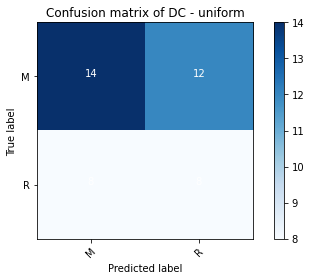

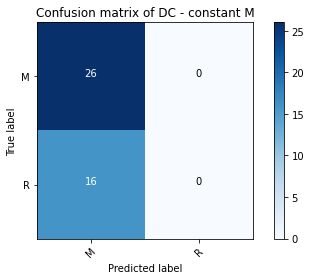

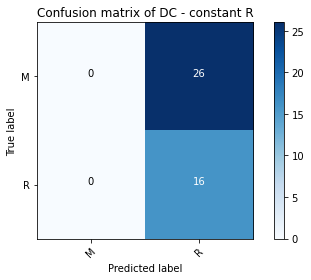

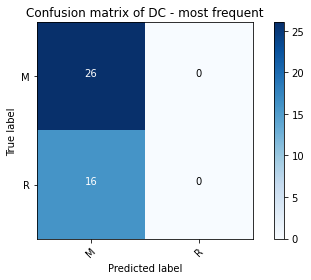

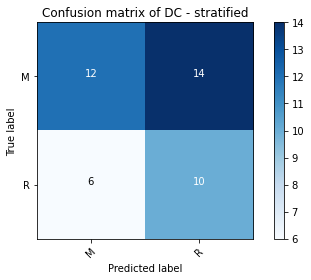

In [ ]:
cnf_matrix = confusion_matrix(y_test, preds_DC[0])
plot_confusion_matrix(cnf_matrix, ['M','R'], 'Confusion matrix of DC - uniform')

cnf_matrix = confusion_matrix(y_test, preds_DC[1])
plot_confusion_matrix(cnf_matrix, ['M','R'], 'Confusion matrix of DC - constant M')

cnf_matrix = confusion_matrix(y_test, preds_DC[2])
plot_confusion_matrix(cnf_matrix, ['M','R'], 'Confusion matrix of DC - constant R')

cnf_matrix = confusion_matrix(y_test, preds_DC[3])
plot_confusion_matrix(cnf_matrix, ['M','R'], 'Confusion matrix of DC - most frequent')

cnf_matrix = confusion_matrix(y_test, preds_DC[4])
plot_confusion_matrix(cnf_matrix, ['M','R'], 'Confusion matrix of DC - stratified')

### Gaussian Naive Bayes Classifier

In [ ]:
def nb(X_train, y_train,X_test,y_test):
    NB = GaussianNB()
    t0 = time.time()
    NB.fit(X_train, y_train)
    time_train_nb = time.time()-t0
    t0 = time.time()
    preds_nb = NB.predict(X_test)
    time_preds_nb = time.time()-t0
    return preds_nb, time_train_nb, time_preds_nb

In [ ]:
preds_nb,_,_ = nb(X_train, y_train,X_test,y_test)
f1_micro_nb = f1_micro(y_test, preds_nb)
print("f1-micro average for GaussianNB Classifier = ", f1_micro_nb)

f1_macro_nb = f1_macro(y_test, preds_nb)
print("f1-macro average for GaussianNB Classifier = ", f1_macro_nb)

f1-micro average for GaussianNB Classifier =  0.7380952380952381
f1-macro average for GaussianNB Classifier =  0.7379466817923994


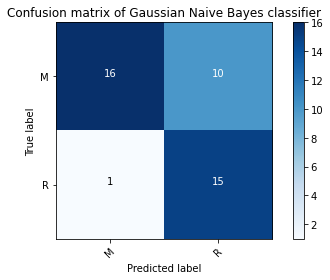

In [ ]:
cnf_matrix = confusion_matrix(y_test, preds_nb)
plot_confusion_matrix(cnf_matrix, ['M','R'], 'Confusion matrix of Gaussian Naive Bayes classifier')

### kNN Classifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
preds_knn = knn.predict(X_test)

In [ ]:
f1_micro_knn = f1_micro(y_test, preds_knn)
print("f1-micro average for KNN Classifier = ", f1_micro_knn)

f1_macro_knn = f1_macro(y_test, preds_knn)
print("f1-macro average for KNN Classifier = ", f1_macro_knn)

f1-micro average for KNN Classifier =  0.8571428571428571
f1-macro average for KNN Classifier =  0.8541666666666667


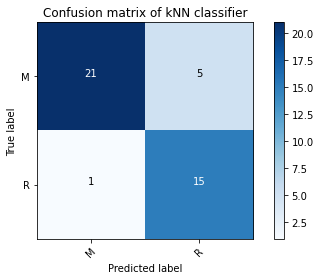

In [ ]:
cnf_matrix = confusion_matrix(y_test, preds_knn)
plot_confusion_matrix(cnf_matrix, ['M','R'], 'Confusion matrix of kNN classifier')

**2. Για κάθε averaged metric, εκτυπώστε bar plot συγκρισης με τις τιμές του συγκεκριμένου f1 για όλους τους classifiers.**

In [ ]:
def plot_bar(classifiers, values, title):
    y = np.arange(len(classifiers))
    
    plt.figure()
    plt.bar(y, values)
    plt.xticks(y, classifiers, rotation=30)
    plt.title(title, fontsize = 20)
    plt.xlabel("Classifiers")
    plt.ylabel("f1-score")
    plt.show()        

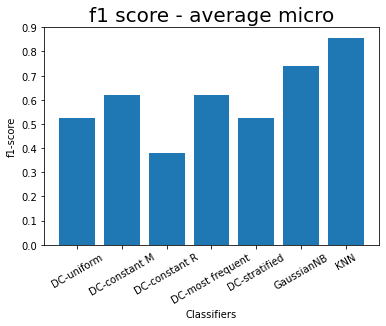

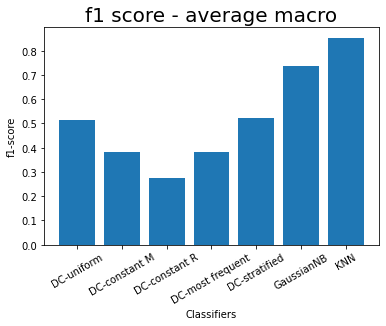

In [ ]:
f1_macro_list1=[f1_macro_DC[0], f1_macro_DC[1], f1_macro_DC[2], f1_macro_DC[3], f1_macro_DC[4], f1_macro_nb, f1_macro_knn]
f1_micro_list1=[f1_micro_DC[0], f1_micro_DC[1], f1_micro_DC[2], f1_micro_DC[3], f1_micro_DC[4], f1_micro_nb, f1_micro_knn]
#Bar plot for f1 score - average micro
plot_bar(classifiers, f1_micro_list1,'f1 score - average micro')

#Bar plot for f1 score - average macro
plot_bar(classifiers, f1_macro_list1,'f1 score - average macro')

**3. Σχολιάστε τα αποτελέσματα των plots και των τιμών precision, recall, f1 των πινάκων σύγχυσης.**

In [ ]:
precision_DC_micro = []
precision_DC_macro = []
recall_DC_micro = []
recall_DC_macro = []
for i in range(0,len(preds_DC)):
    prec_micro, prec_macro = precision(y_test, preds_DC[i])
    precision_DC_micro.append(prec_micro)
    precision_DC_macro.append(prec_macro)
    rec_micro, rec_macro = recall(y_test, preds_DC[i])
    recall_DC_micro.append(rec_micro)
    recall_DC_macro.append(rec_macro)

precision_nb_micro, precision_nb_macro = precision(y_test, preds_nb)
recall_nb_micro, recall_nb_macro = recall(y_test, preds_nb)

precision_knn_micro, precision_knn_macro = precision(y_test, preds_knn)
recall_knn_micro, recall_knn_macro = recall(y_test, preds_knn)

precision_micro_list1 = [precision_DC_micro[0], precision_DC_micro[1], precision_DC_micro[2], precision_DC_micro[3], precision_DC_micro[4],
                  precision_nb_micro, precision_knn_micro]
precision_macro_list1 = [precision_DC_macro[0], precision_DC_macro[1], precision_DC_macro[2], precision_DC_macro[3], precision_DC_macro[4],
                  precision_nb_macro, precision_knn_macro]
recall_micro_list1 = [recall_DC_micro[0], recall_DC_micro[1], recall_DC_micro[2], recall_DC_micro[3], recall_DC_micro[4],
                  recall_nb_micro, recall_knn_micro]
recall_macro_list1 = [recall_DC_macro[0], recall_DC_macro[1], recall_DC_macro[2], recall_DC_macro[3], recall_DC_macro[4],
                  recall_nb_macro, recall_knn_macro]

/home/maria/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
data1 = {
        'Precision-micro average': precision_micro_list1,
        'Precision-macro average': precision_macro_list1,
        'Recall-micro average': recall_micro_list1,
        'Recall-macro average': recall_macro_list1,
        'f1 score-micro average': f1_micro_list1,
        'f1 score-macro average': f1_macro_list1}

In [ ]:
df1 = pd.DataFrame(data1, index = classifiers,columns = ['Precision-micro average', 'Precision-macro average', 'Recall-micro average','Recall-macro average', 'f1 score-micro average', 'f1 score-macro average'])
df1

,Precision-micro average,Precision-macro average,Recall-micro average,Recall-macro average,f1 score-micro average,f1 score-macro average
DC-uniform,0.523810,0.518182,0.523810,0.519231,0.523810,0.513889
DC-constant M,0.619048,0.309524,0.619048,0.500000,0.619048,0.382353
DC-constant R,0.380952,0.190476,0.380952,0.500000,0.380952,0.275862
DC-most frequent,0.619048,0.309524,0.619048,0.500000,0.619048,0.382353
DC-stratified,0.523810,0.541667,0.523810,0.543269,0.523810,0.522727
GaussianNB,0.738095,0.770588,0.738095,0.776442,0.738095,0.737947
KNN,0.857143,0.852273,0.857143,0.872596,0.857143,0.854167


**Σχολιασμός Αποτελεσμάτων:**

Οι πίνακες σύγχυσης μας παρέχουν την πληροφορία για το πως ο ταξινομητής μας προέβλεψε τα αντικείμενα του συνόλου ελέγχου μας. Στο σύνολο μας έχουμε δύο κλάσεις, εκ των οποίων επιλέγεται η μια ως “Positive” (εδώ η Μ) και η άλλη είναι η “Negative” (εδώ η R).  Από την κύρια διαγώνιο παίρνουμε το πόσα αντικείμενα κατηγοριοποιήθηκαν στην κατηγορία που πραγματικά ανήκαν, δηλαδή τα True Positives (TP) και True Negatives (TN) αντίστοιχα. Στην άλλη στήλη κάθε γραμμής έχουμε τα αντικείμενα που κατηγοριοποιήθηκαν λανθασμένα, δηλαδή για την πρώτη γραμμή τα  False Negatives (FN) και για την δεύτερη τα False Positives (FP).
Με την πληροφορία που μας δίνει ο πίνακας σύγχυσης για κάθε ταξινομητή, χρησιμοποιώντας τους κατάλληλους τύπους υπολογίζεται το precision, το recall και στη συνέχεια το f1-score του κάθε ταξινομητή. Αναλυτικά:

**Uniform:**
Ο ταξινομητής αυτός ταξινομεί με τυχαίο ομοιόμορφο τρόπο τα δείγματα του συνόλου ελέγχου στις δύο κλάσεις. Όπως φαίνεται από τον πίνακα σύγχυσης έχουμε αρκετά ψηλό αριθμό FPs και FNs πράγμα που σημαίνει ότι έχουμε χαμηλό precision, recall και επομένως accuracy.<br>
**Constant M:**
O ταξινομητής αυτός επιλέγει πάντα να ταξινομήσει τα δείγματα στην κλάση “Mines” και έτσι όπως είναι λογικό το accuracy του ταξινομητή θα είναι όσο και το ποσοστό των πραγματικών δειγμάτων στην κλάση “Mines”. Όπως βλέπουμε, όλα τα δείγματα ταυτοποιούνται ως “M”, έτσι έχουμε πολλά FPs και κανένα FN. Αυτό πρακτικά σημαίνει ότι θα έχουμε precision και recall ίσο με το ποσοστό των δειγμάτων της κλάσης Μ. <br>
**Constant R:**
O ταξινομητής αυτός επιλέγει πάντα να ταξινομήσει τα δείγματα στην κλάση “Rocks” και έτσι όπως είναι λογικό το accuracy του ταξινομητή θα είναι όσο και το ποσοστό των πραγματικών δειγμάτων στην κλάση “Rocks”. Όπως βλέπουμε, όλα τα δείγματα ταυτοποιούνται ως “R”, έτσι έχουμε πολλά FNs και κανένα FP. H κατηγοριοποίηση εδώ  των κλάσεων σε Positive και Negative μας δίνει τιμές precision και recall ίσες με το ποσοστό των δειγμάτων της κλάσης R.<br>
**Most Frequent:**
O ταξινομητής αυτός επιλέγει την πιο συχνή κατηγορία και ταξινομεί τα πάντα σε αυτήν. Στη περίπτωση του συνόλου μας αυτή είναι η M, οπότε ο ταξινομητής αυτός είναι ακριβώς ο ίδιος με τον Constant M, και τα ίδια σχόλια ισχύουν για τα αποτελέσματα του.<br>
**Stratified:**
Ο ταξινομητής αυτός ταξινομεί με βάση τη συχνότητα εμφάνισης των δειγμάτων στις κλάσεις στο training set, δηλαδή περίπου 53-47. Έχουμε πολύ ψηλή τιμή FNs και αρκετά FPs πράγμα που σημαίνει χαμηλή ακρίβεια, και πολύ χαμηλή ανάκληση.<br>
**Gaussian NB:**
Ο ταξινομητής υποθέτει ότι κάθε χαρακτηριστικό είναι ανεξάρτητο από τα υπόλοιπα, πράγμα που δεν ισχύει πάντα, αλλά σε γενικές γραμμές προσφέρει μια αρκετά καλή εκτίμηση. Όπως βλέπουμε έχουμε αρκετά FNs αλλά μόνο 1 FP. Αυτό σημαίνει σχετικά καλό precision και recall.<br>
**kNN:** Αποδεικνύεται πως είναι ο καλύτερος σε όλα σε σχέση με όλους τους προηγούμενους. H ταξινόμηση που κάνει είναι πολύ ικανοποιητική, λαμβάνοντας υπόψιν ότι η υπερπαράμετρος k έχει επιλεγεί τυχαία και δεν έχει υπολογισθεί η βέλτιστη. Η σχεδίαση του kΝΝ δίνει γενικά καλά αποτελέσματα λόγω του ότι βασίζεται σε μία πιο αλγοριθμική προσέγγιση και καθορίζεται από τη συμπεριφορά των γειτονικών δειγμάτων. Συμπερασματικά έχει πολύ ψηλή ακρίβεια και ικανοποιητική ανάκληση και το ψηλότερο accuracy από όλους τους ταξινομητές.
<br><br>
**Σύγκριση Plots – F1 Scores**
Όπως μπορούμε να δούμε στα δύο ραβδοδιαγράμματα, τα f1-scores των μεθόδων διαφέρουν ανάλογα με το αν έχουν υπολογιστεί χρησιμοποιώντας την μέθοδο macro ή micro. Γι αυτό ακριβώς το λόγο συμβουλευόμαστε και τα δύο για να έχουμε μια καλύτερη εικόνα. Παρατηρούμε ότι στους dummy classifiers, έχουμε κάποιες διαφορές ανάμεσα στις δύο μεθόδους υπολογισμού, αφού στη μία περίπτωση κάποιες dummy μέθοδοι έχουν ψηλά σκορ και στην άλλη χαμηλά. Το συμπέρασμα όμως είναι το ίδιο, και είναι ξεκάθαρο, ο kNN είναι σαφώς ανώτερος ταξινομητής και ο Naive Bayes είναι αισθητά καλύτερος από τους Dummy Classifiers.


## Βελτιστοποίηση ταξινομητών

**Διαδικασία Προεπεξεργασίας:** <br>
Για το δοσμένο dataset δεν χρειάζεται να κάνουμε κάποιου είδους επεξεργασία στα δεδομένα μας άφου δεν έχουμε καθόλου απουσιάζουσες τιμές, και τα δεδομένα μας είναι κανονικοποιημένα. Επίσης, έχει ήδη προηγηθεί mapping στα labels μας νωρίτερα στην άσκηση. <br><br>


In [ ]:
# Normalized dataset

flag=0
for i in range(0,sonar.shape[0]):
    for j in range(0,sonar.shape[1]-1):
        if sonar.values[i,j]<0 or sonar.values[i,j]>1:
            flag=1
            break
if (flag):
    print("Non Normalized dataset")
else:
    print("Normalized dataset")

Normalized dataset


**Variance Threshold**<br>

Μια απλή τεχνική επιλογής χαρακτηριστικών είναι το ελάχιστο κατώφλι της διακύμανσης (Variance threshold). Σε γενικές γραμμές αν η διακύμανση ενός χαρακτηριστικού εισόδου είναι πολύ χαμηλή, δεν μπορεί να προσφέρει σημαντικά στη διαχωριστική ικανότητα του ταξινομητή. Ειδικά στην περίπτωση που η διακύμανση είναι 0, δηλαδή το χαρακτηριστικό εχει σταθερή τιμή για όλα τα δείγματα εκπαίδευσης, δεν χρησιμεύει καθόλου στον ταξινομητή για να αποφασίσει αν ένα δείγμα ανήκει σε μία κλάση ή σε μια άλλη και επιπλέον μπορεί να δυσκολέψει άλλες διαδικασίες της προεπεξεργασίας όπως η κανονικοποίηση των χαρακτηριστικών.

Μπορούμε να χρησιμοποιήσουμε τη συνάρτηση VarianceThreshold για να αφαιρέσουμε τα χαρκτηριστικά στο training set που έχουν μηδενική διακύμανση (default) ή πολύ χαμηλή. Πρέπει επίσης να πάρουμε μια μάσκα (index) των χαρακτηριστικών που επιλέγουμε, ώστε να την εφαρμόσουμε και στα δεδομένα train ώστε να έχουν τις ίδιες διαστάσεις. Αυτό δεν σπάει τον κανόνα ότι δεν χρησιμοποιούμε τα δεδομένα test γιατί μπορούμε να θεωρήσουμε ότι ο ταξινομητής απλώς αγνοεί τις εισόδους που δεν περιλαμβάνονται στη μάσκα.

Με τη χρήση αυτής της μεθόδου απομακρύνουμε τις κολόνες με variance μικρότερο ή ίσο του 0.01 από το αρχικό μας dataset.

In [ ]:
# Reduced dimensionality
selector = VarianceThreshold(threshold=0.01)
train_reduced = selector.fit_transform(X_train)
test_reduced = selector.transform(X_test)

print(train_reduced.shape)
print(test_reduced.shape)

X_train = train_reduced
X_test = test_reduced


(166, 38)
(42, 38)


**Βελτιστοποίηση Υπερπαραμέτρων στον KNN ταξινομητή**

In [ ]:
# φτιάχνουμε μια λίστα από το 1 έως το 50
myList = list(range(1,50))
# Κρατάμε μόνο τα περιττά k
neighbors = list(filter(lambda x: x % 2 != 0, myList))
# empty list that will hold cv scores
cv_scores_macro = []
cv_scores_micro = []
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    #f1_macro
    scores_macro = cross_val_score(knn, X_train, y_train, cv=10, scoring='f1_macro')
    cv_scores_macro.append(scores_macro.mean())
    #f1_micro
    scores_micro = cross_val_score(knn, X_train, y_train, cv=10, scoring='f1_micro')
    cv_scores_micro.append(scores_micro.mean())

In [ ]:
mean_error_macro = [1 - x for x in cv_scores_macro]
mean_error_micro = [1 - x for x in cv_scores_micro]

if np.mean(mean_error_macro) < np.mean(mean_error_micro):
    mean_error = mean_error_macro
else:
    mean_error = mean_error_micro

# determining best k
optimal_k = neighbors[mean_error.index(min(mean_error))]
print("The optimal number of neighbors (calculated in the training set) is %d" % optimal_k)


# για το optimal k παίρνουμε και τα αποτέλεσματα στο test set
knn = KNeighborsClassifier(n_neighbors = optimal_k)
t0 = time.time()
knn.fit(X_train, y_train)
time_train_knn = time.time()-t0

t0 = time.time()
preds_knn_opt = knn.predict(X_test)
time_preds_knn = time.time()-t0
print("\nOptimal accuracy on the test set is", accuracy_score(y_test, preds_knn_opt), "with k=", optimal_k)

The optimal number of neighbors (calculated in the training set) is 1

Optimal accuracy on the test set is 0.8809523809523809 with k= 1


In [ ]:
f1_micro_knn_opt = f1_micro(y_test, preds_knn_opt)
print("f1-micro average for kNN Classifier = ", f1_micro_knn_opt)

f1_macro_knn_opt = f1_macro(y_test, preds_knn_opt)
print("f1-macro average for kNN Classifier = ", f1_macro_knn_opt)

f1-micro average for kNN Classifier =  0.8809523809523809
f1-macro average for kNN Classifier =  0.8721850273889227


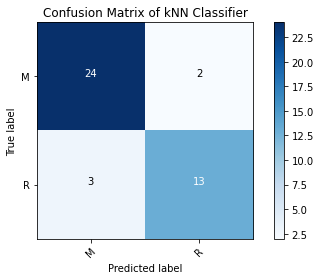

In [ ]:
cnf_matrix = confusion_matrix(y_test, preds_knn_opt)
plot_confusion_matrix(cnf_matrix, ['M','R'],'Confusion Matrix of kNN Classifier')

In [ ]:
preds_nb_opt, time_train_nb, time_preds_nb = nb(X_train,y_train,X_test,y_test)
f1_micro_nb_opt = f1_micro(y_test, preds_nb_opt)
print("f1-micro average for GaussianNB Classifier = ", f1_micro_nb_opt)

f1_macro_nb_opt = f1_macro(y_test, preds_nb_opt)
print("f1-macro average for GaussianNB Classifier = ", f1_macro_nb_opt)

f1-micro average for GaussianNB Classifier =  0.7857142857142857
f1-macro average for GaussianNB Classifier =  0.7846153846153846


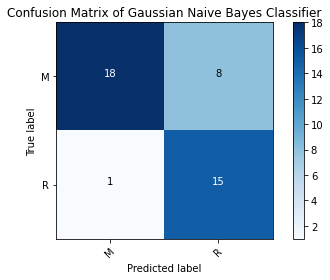

In [ ]:
cnf_matrix = confusion_matrix(y_test, preds_nb_opt)
plot_confusion_matrix(cnf_matrix, ['M','R'],'Confusion Matrix of Gaussian Naive Bayes Classifier')

In [ ]:
preds_DC_opt, time_train_DC, time_preds_DC = DC(X_train, y_train,X_test,y_test)
f1_micro_DC_opt = []
f1_macro_DC_opt = []
for i in range(0,len(preds_DC)):
    f1_micro_DC_opt.append(f1_micro(y_test, preds_DC_opt[i]))
    print("f1 score-micro average for",classifiers[i],"=", f1_micro_DC_opt[i])
    f1_macro_DC_opt.append(f1_macro(y_test, preds_DC_opt[i]))
    print("f1 score-macro average for",classifiers[i],"=", f1_macro_DC_opt[i])

f1 score-micro average for DC-uniform = 0.5476190476190477
f1 score-macro average for DC-uniform = 0.5346938775510204
f1 score-micro average for DC-constant M = 0.6190476190476191
f1 score-macro average for DC-constant M = 0.3823529411764706
f1 score-micro average for DC-constant R = 0.38095238095238093
f1 score-macro average for DC-constant R = 0.27586206896551724
f1 score-micro average for DC-most frequent = 0.6190476190476191
f1 score-macro average for DC-most frequent = 0.3823529411764706
f1 score-micro average for DC-stratified = 0.4523809523809524
f1 score-macro average for DC-stratified = 0.43673469387755104


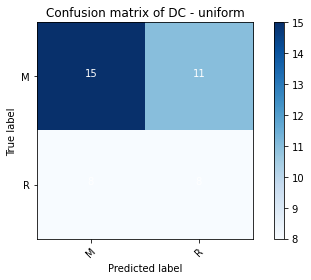

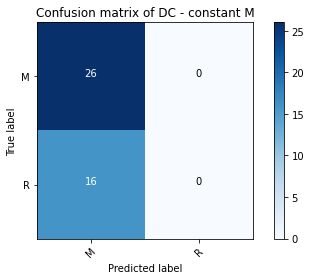

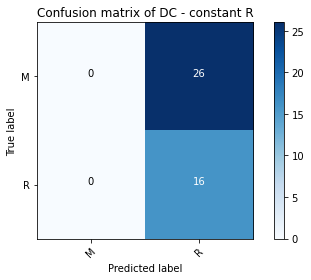

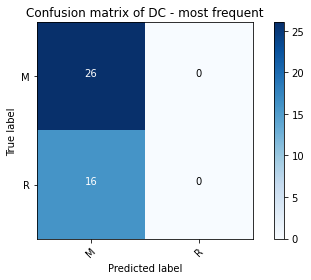

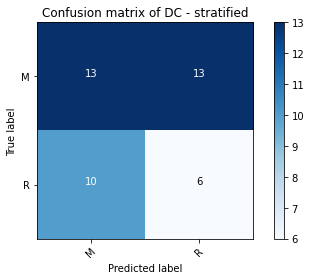

In [ ]:
cnf_matrix = confusion_matrix(y_test, preds_DC_opt[0])
plot_confusion_matrix(cnf_matrix, ['M','R'], 'Confusion matrix of DC - uniform')

cnf_matrix = confusion_matrix(y_test, preds_DC_opt[1])
plot_confusion_matrix(cnf_matrix, ['M','R'], 'Confusion matrix of DC - constant M')

cnf_matrix = confusion_matrix(y_test, preds_DC_opt[2])
plot_confusion_matrix(cnf_matrix, ['M','R'], 'Confusion matrix of DC - constant R')

cnf_matrix = confusion_matrix(y_test, preds_DC_opt[3])
plot_confusion_matrix(cnf_matrix, ['M','R'], 'Confusion matrix of DC - most frequent')

cnf_matrix = confusion_matrix(y_test, preds_DC_opt[4])
plot_confusion_matrix(cnf_matrix, ['M','R'], 'Confusion matrix of DC - stratified')

**2. Για το τελικό fit του κάθε ταξινομητή στο σύνολο του training set και για το predict στο test set εκτυπώστε πίνακες με τους χρόνους εκτέλεσης.**

In [ ]:
time_train = time_train_DC
time_train.append(time_train_nb)
time_train.append(time_train_knn)

time_preds = time_preds_DC
time_preds.append(time_preds_nb)
time_preds.append(time_preds_knn)

data_time = {
            'Training Time': time_train,        
            'Prediction Time': time_preds}

df_time = pd.DataFrame(data_time, index = classifiers,columns = ['Training Time','Prediction Time'])
df_time

,Training Time,Prediction Time
DC-uniform,0.004930,0.000364
DC-constant M,0.000275,0.000127
DC-constant R,0.000232,0.000041
DC-most frequent,0.000158,0.000067
DC-stratified,0.000192,0.000266
GaussianNB,0.002851,0.000214
KNN,0.001491,0.003422


**3. Για κάθε averaged metric, εκτυπώστε bar plot σύγκρισης με τις τιμές του συγκεκριμένου f1 για όλους τους classifiers.**

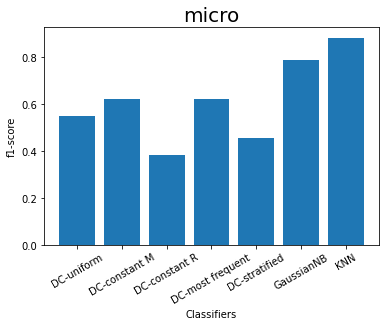

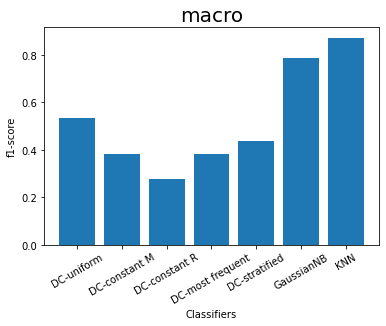

In [ ]:
f1_macro_list2=[f1_macro_DC_opt[0], f1_macro_DC_opt[1], f1_macro_DC_opt[2], f1_macro_DC_opt[3], f1_macro_DC_opt[4], f1_macro_nb_opt, f1_macro_knn_opt]
f1_micro_list2=[f1_micro_DC_opt[0], f1_micro_DC_opt[1], f1_micro_DC_opt[2], f1_micro_DC_opt[3], f1_micro_DC_opt[4], f1_micro_nb_opt, f1_micro_knn_opt]

#Bar plot for f1 score - average micro
plot_bar(classifiers,f1_micro_list2,'micro')

#Bar plot for f1 score - average macro
plot_bar(classifiers,f1_macro_list2,'macro')

**4. Τυπώστε πίνακα με τη μεταβολή της επίδοσης των ταξινομητών πριν και μετά τη βελτιστοποίησή τους.**



In [ ]:
data_micro = {
            'Before': f1_micro_list1,
            'After': f1_micro_list2}
        

df_micro = pd.DataFrame(data_micro, index = classifiers,columns = ['Before','After'])
print('f1 score - micro average')
df_micro

f1 score - micro average


,Before,After
DC-uniform,0.523810,0.547619
DC-constant M,0.619048,0.619048
DC-constant R,0.380952,0.380952
DC-most frequent,0.619048,0.619048
DC-stratified,0.523810,0.452381
GaussianNB,0.738095,0.785714
KNN,0.857143,0.880952


In [ ]:
data_macro = {
            'Before': f1_macro_list1,        
            'After': f1_macro_list2}

df_macro = pd.DataFrame(data_macro, index = classifiers,columns = ['Before','After'])
print('f1 score - macro average')
df_macro

f1 score - macro average


,Before,After
DC-uniform,0.513889,0.534694
DC-constant M,0.382353,0.382353
DC-constant R,0.275862,0.275862
DC-most frequent,0.382353,0.382353
DC-stratified,0.522727,0.436735
GaussianNB,0.737947,0.784615
KNN,0.854167,0.872185


**5. Σχολιάστε τα αποτελέσματα των plots και των τιμών precision, recall, f1 των πινάκων σύγχυσης, τη μεταβολή της απόδοσης και τους χρόνους εκτέλεσης.**

In [ ]:
precision_DC_micro_opt = []
precision_DC_macro_opt = []
recall_DC_micro_opt = []
recall_DC_macro_opt = []
for i in range(0,len(preds_DC)):
    prec_micro, prec_macro = precision(y_test, preds_DC_opt[i])
    precision_DC_micro_opt.append(prec_micro)
    precision_DC_macro_opt.append(prec_macro)
    rec_micro, rec_macro = recall(y_test, preds_DC_opt[i])
    recall_DC_micro_opt.append(rec_micro)
    recall_DC_macro_opt.append(rec_macro)

precision_nb_micro_opt, precision_nb_macro_opt = precision(y_test, preds_nb_opt)
recall_nb_micro_opt, recall_nb_macro_opt = recall(y_test, preds_nb_opt)

precision_knn_micro_opt, precision_knn_macro_opt = precision(y_test, preds_knn_opt)
recall_knn_micro_opt, recall_knn_macro_opt = recall(y_test, preds_knn_opt)

precision_micro_list2 = [precision_DC_micro_opt[0], precision_DC_micro_opt[1], precision_DC_micro_opt[2],
                         precision_DC_micro_opt[3], precision_DC_micro_opt[4],precision_nb_micro_opt,
                         precision_knn_micro_opt]
precision_macro_list2 = [precision_DC_macro_opt[0], precision_DC_macro_opt[1], precision_DC_macro_opt[2],
                         precision_DC_macro_opt[3], precision_DC_macro_opt[4],precision_nb_macro_opt
                         , precision_knn_macro_opt]
recall_micro_list2 = [recall_DC_micro_opt[0], recall_DC_micro_opt[1], recall_DC_micro_opt[2],
                      recall_DC_micro_opt[3], recall_DC_micro_opt[4],
                  recall_nb_micro_opt, recall_knn_micro_opt]
recall_macro_list2 = [recall_DC_macro_opt[0], recall_DC_macro_opt[1], recall_DC_macro_opt[2],
                       recall_DC_macro_opt[3], recall_DC_macro_opt[4],
                  recall_nb_macro_opt, recall_knn_macro_opt]


/home/maria/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
data2 = {
        'Precision-micro average': precision_micro_list2,
        'Precision-macro average': precision_macro_list2,
        'Recall-micro average': recall_micro_list2,
        'Recall-macro average': recall_macro_list2,
        'f1 score-micro average': f1_micro_list2,
        'f1 score-macro average': f1_macro_list2}

df2 = pd.DataFrame(data2, index = classifiers,columns = ['Precision-micro average', 'Precision-macro average', 'Recall-micro average','Recall-macro average', 'f1 score-micro average', 'f1 score-macro average'])
df2

,Precision-micro average,Precision-macro average,Recall-micro average,Recall-macro average,f1 score-micro average,f1 score-macro average
DC-uniform,0.547619,0.536613,0.547619,0.538462,0.547619,0.534694
DC-constant M,0.619048,0.309524,0.619048,0.500000,0.619048,0.382353
DC-constant R,0.380952,0.190476,0.380952,0.500000,0.380952,0.275862
DC-most frequent,0.619048,0.309524,0.619048,0.500000,0.619048,0.382353
DC-stratified,0.452381,0.440503,0.452381,0.437500,0.452381,0.436735
GaussianNB,0.785714,0.799771,0.785714,0.814904,0.785714,0.784615
KNN,0.880952,0.877778,0.880952,0.867788,0.880952,0.872185


**Σχολιασμός Αποτελεσμάτων:**

Όπως ήταν αναμενόμενο, μετά την εκπαίδευση έχουμε διαφορές μόνο στους ταξινομητές Gaussian Naive Bayes και kNN. Οι Dummy Classifiers εφόσον χρησιμοποιούν συγκεκριμένες απλές στρατηγικές, δε μπορούν  ουσιαστικά να εκπαιδευτούν. Επομένως, δεν έχουν καμία μεταβολή στα precision, recall και f1 scores τους. Εξαίρεση μπορεί να αποτελέσουν οι uniform και stratified ταξινομητές οι οποίοι έχουν τυχαιότητα στον τρόπο που κατηγοριοποιούν τα δείγματα.
Παρατηρώντας τo confusion matrix του GNB, βλέπουμε ότι συγκριτικά με πριν έχουμε μείωση στα δείγματα που κατηγοριοποιούνται false negatives (άρα αύξηση στα TP), ενώ τα false positives μένουν σταθερά. Αυτό έχει ως αποτέλεσμα ψηλότερο ποσοστό ακρίβειας και ανάκλησης, και άρα ψηλότερα f1 scores και στις δύο μεθόδους, micro και macro. Η αλλαγή αύτη οφείλεται στην μείωση της διαστατικότητας των δεδομένων ως αποτέλεσμα της προεπξεργασίας. Η αύξηση του f1 score στον ταξινομητή είναι της τάξης του **5%** και στις δύο μεθόδους.
Παρατηρώντας τo confusion matrix του kNN, βλέπουμε ότι συγκριτικά με πριν έχουμε μείωση στα δείγματα που κατηγοριοποιούνται false negatives (άρα αύξηση στα TP), αλλά και μια μικρή αύξηση στα false positives. Είναι πιθανό επειδή το dataset μας είναι μικρό και τέτοιο ώστε η υπερπαράμετρος k γίνεται βέλτιστη για k=1 το ο ταξινομητής μας να κάνει ελαφρώς overfitting στο training set. Το αποτέλεσμα της εκπαίδευσης, είναι θετικό αλλά η βελτίωση στα f1 scores είναι πολύ μικρή, της τάξης του **2.5%**. Ικανοποιητικό αποτέλεσμα δεδομένου ότι ο ταξινομητής δούλευε αρκετά καλά ακόμα και πριν την εκπαίδευση.<br>
Από τα ραβδοδιαγράμματα μπορούμε να δούμε πως οι ταξινομητές μας εξακολουθούν να έχουν τις ίδιες αποδόσεις με πριν, με μικρή αύξηση για τους GNB και kNN.<br>
Τέλος, όσον αφορά τους χρόνους εκτέλεσης, τόσο της εκπαίδευσης όσο και της πρόβλεψης, βλέπουμε ότι είναι της τάξης του 1ms, δηλαδή ασήμαντοι. Αυτό οφείλεται φυσικά στο μικρό μέγεθος του dataset που εξετάζουμε.


# Μεγάλο dataset (ISOLET)
### Βασικές Πληροφορίες
**1. Σύντομη παρουσίαση του dataset:** <br>
To σύνολο δεδομένων μας περιέχει στοιχεία από φωνητικές ηχογραφήσεις 150 ατόμων, οι οποίοι ηχογραφήθηκαν να λένε τα ονόματα των 26 γραμμάτων του λατινικού αλφάβητου. Τα σύνολο δεδομένων μας είναι χωρισμένο σε 5 ομάδες των 30 ατόμων, όμως για τους σκοπούς της άσκησης μας ζητήθηκε να ενώσουμε τα δεδομένα σε ένα μεγάλο dataset.
Υπάρχουν 52 παραδείγματα από κάθε άτομο (δύο φορές το κάθε γράμμα). Τα χαρακηριστικά των δειγμάτων Τα  φασματικούς συντελεστές. χαρακτηριστικά περιγράμματος, χαρακτηριστικά sonorant, χαρακτηριστικά pre-sonorant και post-sonorant. Η ακριβής σειρά εμφάνισης των χαρακτηριστικών αυτών, δεν είναι γνωστή.
Κάθε δείγμα αποτελείται από 617 χαρακτηριστικά τα οποία είναι κανονικοποιημένα και περιέχουν τιμές στο διάστημα (-1.0,1.0).

In [ ]:
isolet = pd.read_csv("isolet_full.data", header = None)
isolet

,0,1,2,3,4,5,6,7,8,9,...,608,609,610,611,612,613,614,615,616,617
0,-0.4394,-0.0930,0.1718,0.4620,0.6226,0.4704,0.3578,0.0478,-0.1184,-0.2310,...,0.4102,0.2052,0.3846,0.3590,0.5898,0.3334,0.6410,0.5898,-0.4872,1.0
1,-0.4348,-0.1198,0.2474,0.4036,0.5026,0.6328,0.4948,0.0338,-0.0520,-0.1302,...,0.0000,0.2954,0.2046,0.4772,0.0454,0.2046,0.4318,0.4546,-0.0910,1.0
2,-0.2330,0.2124,0.5014,0.5222,-0.3422,-0.5840,-0.7168,-0.6342,-0.8614,-0.8318,...,-0.1112,-0.0476,-0.1746,0.0318,-0.0476,0.1112,0.2540,0.1588,-0.4762,2.0
3,-0.3808,-0.0096,0.2602,0.2554,-0.4290,-0.6746,-0.6868,-0.6650,-0.8410,-0.9614,...,-0.0504,-0.0360,-0.1224,0.1366,0.2950,0.0792,-0.0072,0.0936,-0.1510,2.0
4,-0.3412,0.0946,0.6082,0.6216,-0.1622,-0.3784,-0.4324,-0.4358,-0.4966,-0.5406,...,0.1562,0.3124,0.2500,-0.0938,0.1562,0.3124,0.3124,0.2188,-0.2500,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7792,-0.6842,-0.3280,-0.1984,0.2956,0.8786,0.8948,0.3118,0.1822,0.1012,0.1740,...,0.7738,0.7738,0.7142,0.6428,0.5952,0.5714,0.3928,0.4286,0.2858,24.0
7793,-0.5912,-0.2420,0.8174,1.0000,0.4642,0.6428,0.6944,0.3056,-0.3888,-0.6826,...,0.1924,-0.1154,0.0192,0.2116,-0.0384,0.0192,-0.2308,-0.4230,-0.7116,25.0
7794,-0.6696,-0.3730,0.1584,0.8910,1.0000,0.9762,0.9762,0.7684,0.4106,0.0154,...,0.0910,0.1818,0.2000,0.1454,0.0182,-0.2910,0.0728,0.0728,-0.5818,25.0
7795,-0.5764,-0.1764,0.5106,0.3742,-0.1670,-0.5858,-0.7882,-0.7224,-0.6330,-0.8212,...,0.4130,0.5870,0.4348,0.5652,0.3478,-0.0434,0.3044,-0.0434,-0.5000,26.0


**2. Αριθμός δειγμάτων και χαρακτηριστικών, είδος χαρακτηριστικών. Υπάρχουν μη διατεταγμένα χαρακτηριστικά και ποια είναι αυτά;**<br>
Αριθμός δειγμών: 7797 <br>
Αριθμός Χαρακτηστικών: 617 <br>
Είδος χαρακτηριστικών: Πραγματικοί αριθμοί (κανονικοποιημένοι από |0.0-1.0|).<br>
Τα χαρακτηριστικά κάθε δείγματος είναι διατεταγμένα, χωρίς όμως να είναι γνωστή η σειρά των διάφορων χαρακτηριστικών.

In [ ]:
samples, num = isolet.shape
num_features = num-1


print("Samples:", samples)
print("Features:", num_features)

Samples: 7797
Features: 617


**3. Υπάρχουν επικεφαλίδες; Αρίθμηση γραμμών;**<br>
Δεν υπάρχουν επικεφαλίδες ούτε αρίθμηση γραμμών.

**4. Ποιες είναι οι ετικέτες των κλάσεων και σε ποια κολόνα βρίσκονται;** <br>
Οι ετικέτες των κλάσεων είναι οι αριθμοί 1 μέχρι 26 (αντιπροσωπεύουν τα γράμματα του αλφαβήτου) και βρίσκονται στην τελευταία κολόνα, την 617.<br>

In [ ]:
labels_isolet = isolet.iloc[:, 617]
print(labels_isolet)
print(labels_isolet.shape)

0        1.0
1        1.0
2        2.0
3        2.0
4        3.0
        ... 
7792    24.0
7793    25.0
7794    25.0
7795    26.0
7796    26.0
Name: 617, Length: 7797, dtype: float64
(7797,)


**5. Χρειάστηκε να κάνετε μετατροπές στα αρχεία text και ποιες?** <br>
Το σύνολο δεδομένων μας ήταν χωρισμένο σε πιο μικρές ομάδες δειγμάτων. Χρειάστηκε να συνδέσουμε ολόκληρο το dataset (concatenation) σε ένα μεγάλο αρχείο. Δεν ήταν αναγκαία καμία περαιτέρω μορφοποίηση μέσα στα αρχεία text.


**6. Υπάρχουν απουσιάζουσες τιμές; Πόσα είναι τα δείγματα με απουσιάζουσες τιμές και ποιο το ποσοστό τους επί του συνόλου;** <br>
Στο dataset μας θα έπρεπε να υπάρχουν θεωρητιθκά 7800 δείγματα (52*150). Στην πραγματικότητα όμως τα δείγματα μας είναι 7997 γιατί απουσιάζουν 3 δείγματα, κατά πάσα πιθανότητα λόγω προβλημάτων κατά τη διάρκεια της ηχογράφησης. Από τα υπάρχοντα δείγματα, δεν απουσιάζει καμία τιμή για κάποιο από τα χαρακτηριστικά τους, επομένως το ποσοστό τους επί του συνόλου είναι 0%.  <br>

In [ ]:
# Check for NaN
print("#NaN in dataset = "  ,isolet.isnull().sum().sum())

#NaN in dataset =  0


In [ ]:
cat isolet_full.all-data | grep "?" |  wc -l

**7. Ποιος είναι ο αριθμός των κλάσεων και τα ποσοστά δειγμάτων τους επί του συνόλου; Αν θεωρήσουμε ότι ένα dataset είναι μη ισορροπημένο αν μια οποιαδήποτε κλάση είναι 1.5 φορά πιο συχνή από κάποια άλλη (60%-40% σε binary datasets) εκτιμήστε την ισορροπία του dataset.**<br>
Στο dataset μας υπάρχουν 26 διαφορετικές κλάσεις, μία για κάθε γράμμα του λατινικού αλφαβήτου. Κάθε άτομο ζητήθηκε να ηχογραφήσει 2 προσπάθειες για κάθε κλάση, επομένως θεωρητικά οι κλάσεις μας πρέπει να είναι απόλυτα ισορροπημένες. Στην πραγματικότητα λείπουν τρία δείγματα από το σύνολο δεδομένων, πράγμα που δημιουργεί μια ελάχιστη και αμελητέα διαφορά σε κάποιες κλάσεις.<br>
Η κάθε κλάση αποτελεί το **3.84%** του συνόλου.


In [ ]:
alphabet = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]
labels = [0]*26
logos = []
for i in labels_isolet:
    labels[int(i)-1] = labels[int(i)-1] + 1.0
print(labels)
bigger = 0
smallest = 100
for i in labels:
    logos.append(i/len(labels_isolet))
    if bigger < i/len(labels_isolet) :
        bigger = i/len(labels_isolet)
    if smallest > i/len(labels_isolet):
        smallest = i/len(labels_isolet)
for i in range(26):
    print("Για την κλάση γράμματος ", alphabet[i]," το ποσοστό είναι: ", logos[i])

print("Η μεγαλύτερη διαφορά στα ποσοστά των κλάσεων είναι :",bigger - smallest, "δηλαδή της τάξης του 0,002%")

    
    

[300.0, 300.0, 300.0, 300.0, 300.0, 298.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 299.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0, 300.0]
Για την κλάση γράμματος  a  το ποσοστό είναι:  0.038476337052712584
Για την κλάση γράμματος  b  το ποσοστό είναι:  0.038476337052712584
Για την κλάση γράμματος  c  το ποσοστό είναι:  0.038476337052712584
Για την κλάση γράμματος  d  το ποσοστό είναι:  0.038476337052712584
Για την κλάση γράμματος  e  το ποσοστό είναι:  0.038476337052712584
Για την κλάση γράμματος  f  το ποσοστό είναι:  0.03821982813902783
Για την κλάση γράμματος  g  το ποσοστό είναι:  0.038476337052712584
Για την κλάση γράμματος  h  το ποσοστό είναι:  0.038476337052712584
Για την κλάση γράμματος  i  το ποσοστό είναι:  0.038476337052712584
Για την κλάση γράμματος  j  το ποσοστό είναι:  0.038476337052712584
Για την κλάση γράμματος  k  το ποσοστό είναι:  0.038476337052712584
Για την κλάση γράμματος  l  το ποσοστό είναι:  0.038476337052712584
Γι

**8. Διαχωρίστε σε train και test set. Εάν υπάρχουν απουσιάζουσες τιμές και μη διατεταγμένα χαρακτηριστικά διαχειριστείτε τα και αιτιολογήστε τις επιλογές σας.**<br>
Χωρίζουμε το dataset μας σε ποσοστό 70% για το training set και 30% για το test set. Δεν υπάρχουν απουσιάζουσες τιμές ούτε μη διατεταγμένα χαρακτηριστικά.<br>
Αρχικά το dataset μας ήταν χωρισμένο σε κομμάτια, ένα εκ των οποίων ήταν το test set το οποίο περιείχε το 20% του συνόλου. Δεδομένου ότι ενώσαμε όλα τα δείγματα σε ένα μεγάλο αρχείο, χρειάστηκε να χωρίσουμε ξανά το dataset μας σε training και test sets, παίρνοντας έτσι το επιθυμητό 30%. 

In [ ]:
features = isolet.iloc[:, 0:617]

X_train, X_test, y_train, y_test = train_test_split(features, labels_isolet, test_size=0.3, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
#print(X_test)

(5457, 617)
(5457,)
(2340, 617)
(2340,)


## Baseline classification

**1. Διαχειριστείτε τυχόν απουσιάζουσες τιμές. Εκπαιδεύστε στο train τους classifiers με default τιμές (απλή αρχικοποίηση). Κάντε εκτίμηση στο test set (μαζί με τους dummy) και τυπώστε για κάθε estimator: confusion matrix, f1-micro average και f1-macro average.** <br>
Στο dataset μας όπως δείξαμε πιο πάνω δεν υπάρχουν απουσιάζουσες τιμές.

### Dummy Classifier

Λόγω του ότι το το dataset μας αποτελείται από 26 διαφορετικές κλάσεις, θεωρήσαμε περιττό να δημιουργήσουμε constant dummy classifiers για κάθε μία από τις 26 κλάσεις. Έτσι επικεντρώνουμε την προσοχή μας στους uniform και stratified classifiers.

In [ ]:
def DC(X_train, y_train, X_test, y_test):
    time_train = []
    time_preds = []
    # train dummy classifier and calculate time of training
    dc_uniform = DummyClassifier(strategy="uniform")
    dc_stratified = DummyClassifier(strategy="stratified")


    # fit and calculate training time
    t0 = time.time()
    model_uniform = dc_uniform.fit(X_train, y_train)
    time_train.append(time.time()-t0)
    t0 = time.time()
    model_stratified = dc_stratified.fit(X_train, y_train)
    time_train.append(time.time()-t0)


    # prediction
    t0 = time.time()
    preds_uniform = model_uniform.predict(X_test)
    time_preds.append(time.time()-t0)
    t0 = time.time()
    preds_stratified = model_stratified.predict(X_test)
    time_preds.append(time.time()-t0)

    preds = [preds_uniform,preds_stratified]
    return preds, time_train, time_preds

In [ ]:
def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize = (20,10))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()  
    plt.show()

f1 score-micro average for DC-uniform = 0.03803418803418803
f1 score-macro average for DC-uniform = 0.03790850030440765


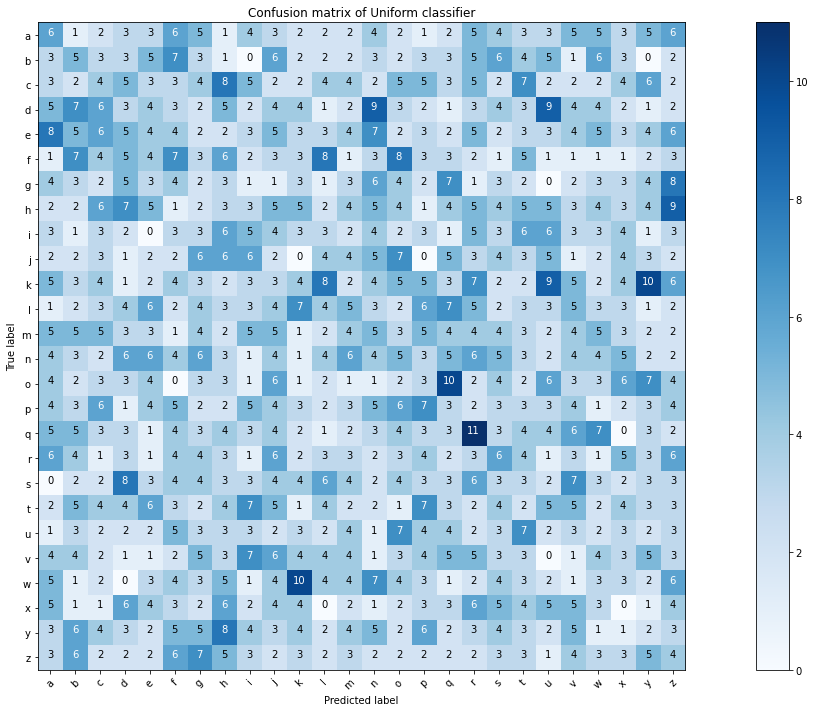

f1 score-micro average for DC-stratified = 0.037606837606837605
f1 score-macro average for DC-stratified = 0.03723866861381769


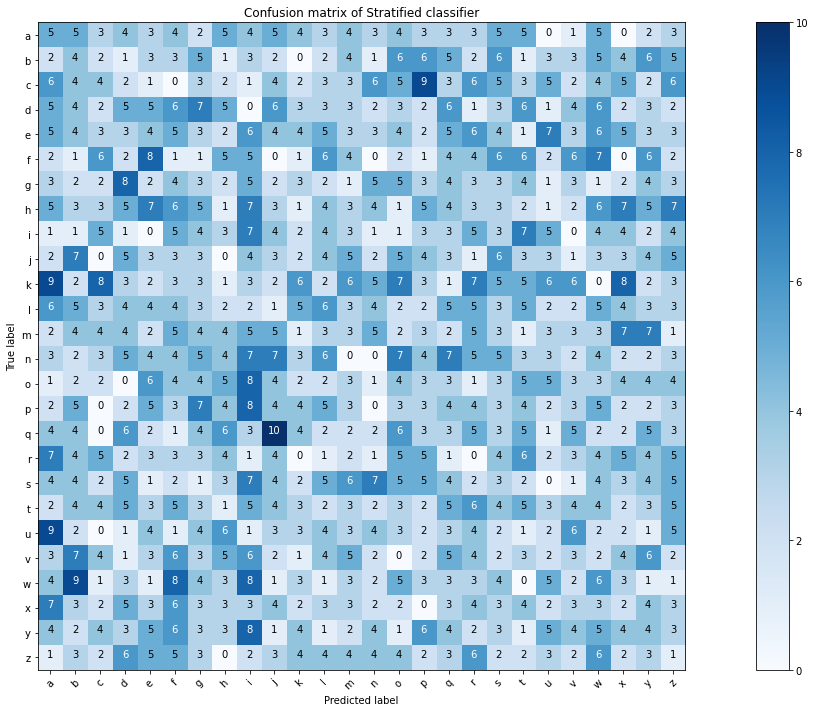

In [ ]:
preds_DC, _, _ = DC(X_train, y_train,X_test,y_test)
f1_micro_DC= []
f1_macro_DC= []
classifiers = ['DC-uniform', 'DC-stratified', 'GaussianNB','KNN','MLP', 'SVM','SVM linear']
for i in range(0,len(preds_DC)):
    f1_micro_DC.append(f1_micro(y_test, preds_DC[i]))
    print("f1 score-micro average for",classifiers[i],"=", f1_micro_DC[i])
    f1_macro_DC.append(f1_macro(y_test, preds_DC[i]))
    print("f1 score-macro average for",classifiers[i],"=", f1_macro_DC[i])
    cnf_matrix = confusion_matrix(y_test, preds_DC[i])
    if i==0:
      plot_confusion_matrix(cnf_matrix, ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"], 'Confusion matrix of Uniform classifier')
    else:
      plot_confusion_matrix(cnf_matrix, ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"], 'Confusion matrix of Stratified classifier')

### Gaussian Naive Bayes Classifier

In [ ]:
def nb(X_train, y_train,X_test,y_test):
    NB = GaussianNB()
    t0 = time.time()
    NB.fit(X_train, y_train)
    time_train_nb = time.time()-t0
    t0 = time.time()
    preds_nb = NB.predict(X_test)
    time_preds_nb = time.time()-t0
    return preds_nb, time_train_nb, time_preds_nb

f1-micro average for GaussianNB Classifier =  0.8072649572649573
f1-macro average for GaussianNB Classifier =  0.7972622357666496


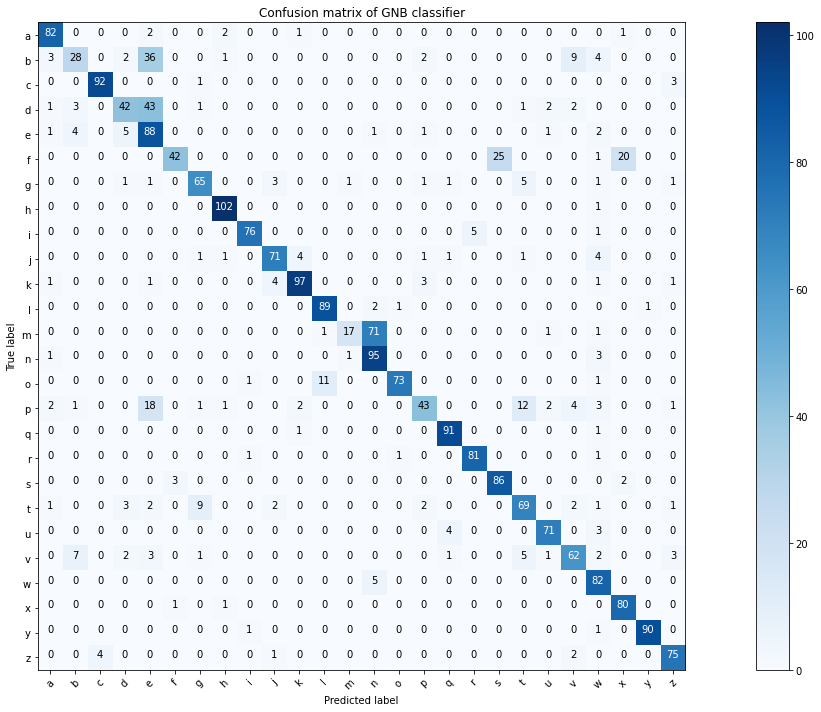

In [ ]:
preds_nb,_,_ = nb(X_train, y_train,X_test,y_test)
f1_micro_nb = f1_micro(y_test, preds_nb)
print("f1-micro average for GaussianNB Classifier = ", f1_micro_nb)

f1_macro_nb = f1_macro(y_test, preds_nb)
print("f1-macro average for GaussianNB Classifier = ", f1_macro_nb)

cnf_matrix = confusion_matrix(y_test, preds_nb)
plot_confusion_matrix(cnf_matrix, ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"], 'Confusion matrix of GNB classifier')

### kNN Classifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
preds_knn = knn.predict(X_test)

In [ ]:
f1_micro_knn = f1_micro(y_test, preds_knn)
print("f1-micro average for KNN Classifier = ", f1_micro_knn)

f1_macro_knn = f1_macro(y_test, preds_knn)
print("f1-macro average for KNN Classifier = ", f1_macro_knn)

f1-micro average for KNN Classifier =  0.8666666666666667
f1-macro average for KNN Classifier =  0.8677322346113402


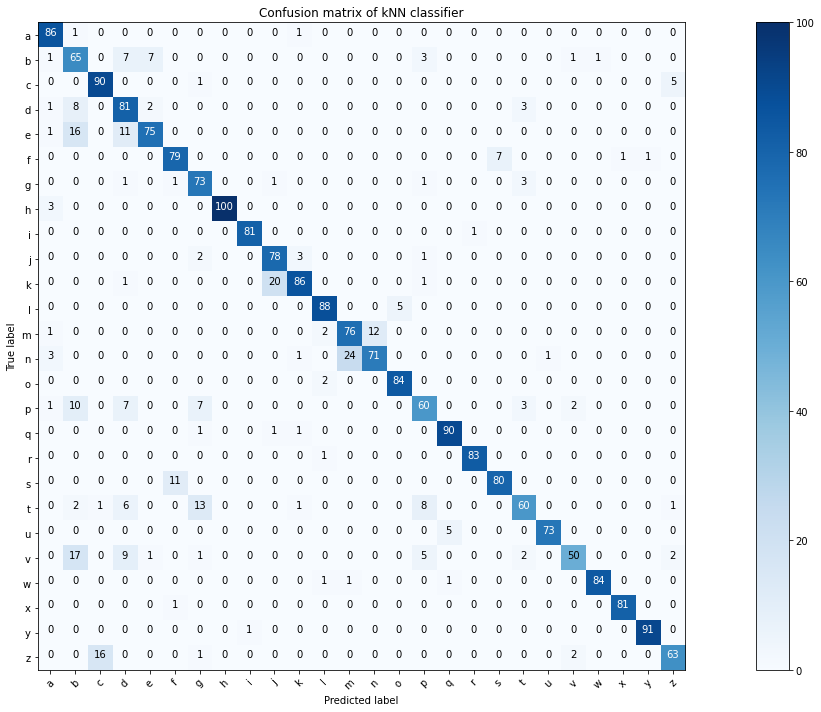

In [ ]:
cnf_matrix = confusion_matrix(y_test, preds_knn)
plot_confusion_matrix(cnf_matrix, ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"], 'Confusion matrix of kNN classifier')

### MLP Classifier

In [ ]:
mlp = MLPClassifier()

mlp.fit(X_train, y_train)
preds_mlp = mlp.predict(X_test)

f1-micro average for MLP Classifier =  0.9504273504273504
f1-macro average for MLP Classifier =  0.9507071692912318


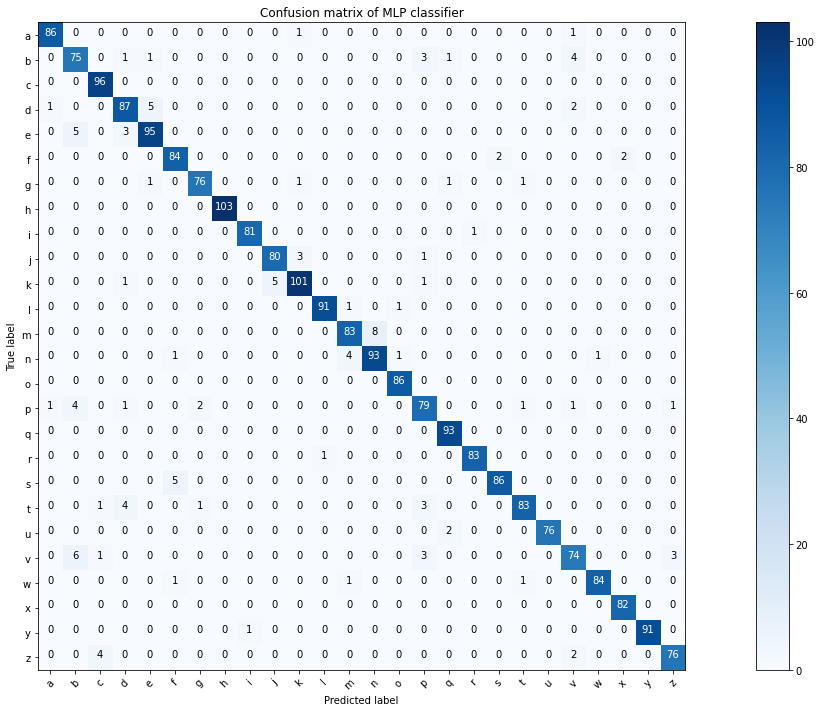

In [ ]:
f1_micro_mlp = f1_micro(y_test, preds_mlp)
print("f1-micro average for MLP Classifier = ", f1_micro_mlp)

f1_macro_mlp = f1_macro(y_test, preds_mlp)
print("f1-macro average for MLP Classifier = ", f1_macro_mlp)

cnf_matrix = confusion_matrix(y_test, preds_mlp)
plot_confusion_matrix(cnf_matrix, ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"], 'Confusion matrix of MLP classifier')

## SVM

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
preds_svm = svm.predict(X_test)

f1-micro average for SVM Classifier =  0.9542735042735043
f1-macro average for SVM Classifier =  0.9547523080027586


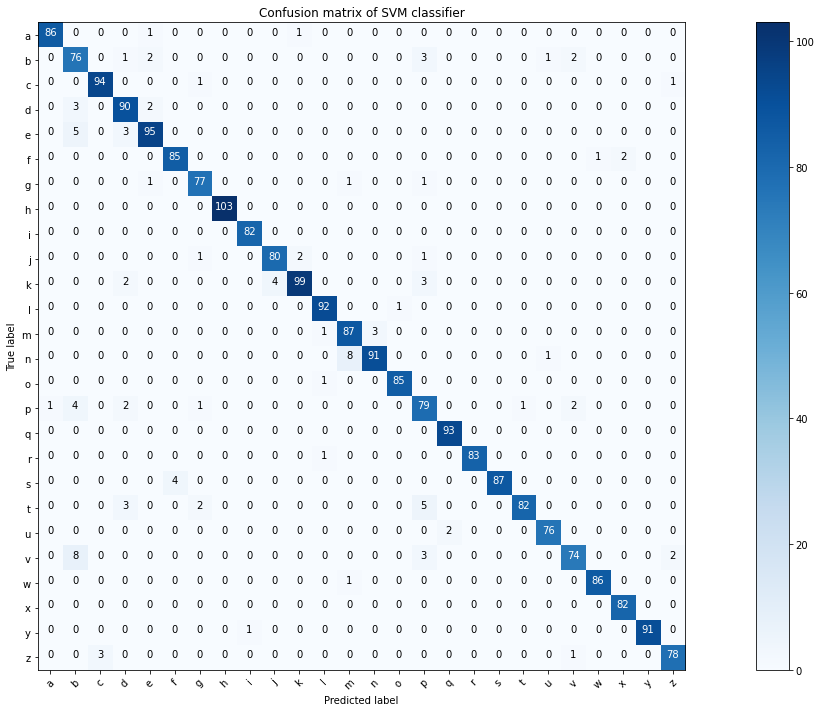

In [ ]:
f1_micro_svm = f1_micro(y_test, preds_svm)
print("f1-micro average for SVM Classifier = ", f1_micro_svm)

f1_macro_svm = f1_macro(y_test, preds_svm)
print("f1-macro average for SVM Classifier = ", f1_macro_svm)

cnf_matrix = confusion_matrix(y_test, preds_svm)
plot_confusion_matrix(cnf_matrix, ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"], 'Confusion matrix of SVM classifier')

# SVM linear

In [ ]:
svm_linear = LinearSVC()
svm_linear.fit(X_train, y_train)
preds_svm_linear = svm_linear.predict(X_test)

/home/maria/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


f1-micro average for SVM Classifier =  0.9427350427350427
f1-macro average for SVM Classifier =  0.9426430082905346


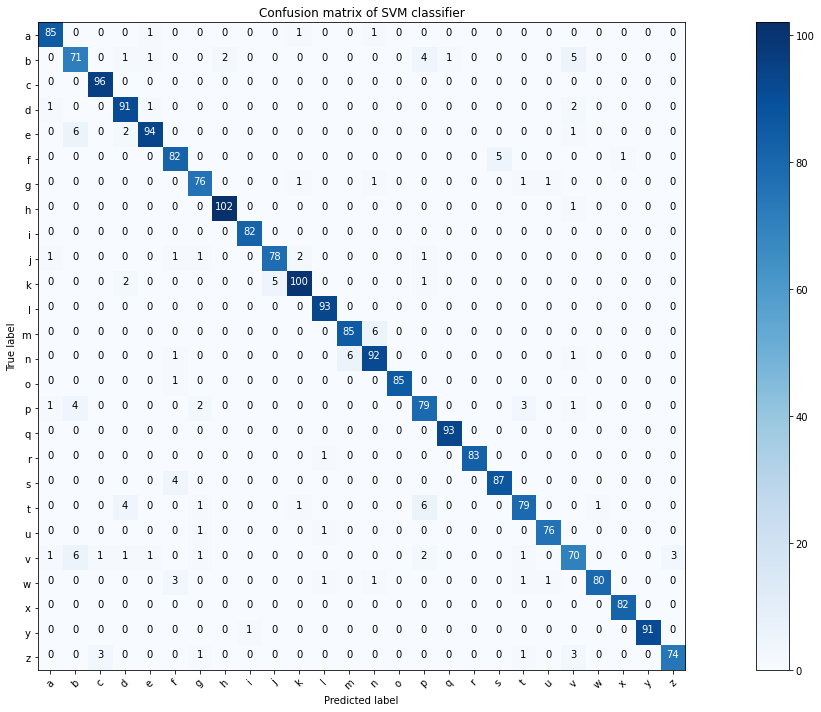

In [ ]:
f1_micro_svm_linear = f1_micro(y_test, preds_svm_linear)
print("f1-micro average for SVM Classifier = ", f1_micro_svm_linear)

f1_macro_svm_linear = f1_macro(y_test, preds_svm_linear)
print("f1-macro average for SVM Classifier = ", f1_macro_svm_linear)

cnf_matrix = confusion_matrix(y_test, preds_svm_linear)
plot_confusion_matrix(cnf_matrix, ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"], 'Confusion matrix of SVM classifier')

**2. Για κάθε averaged metric, εκτυπώστε bar plot συγκρισης με τις τιμές του συγκεκριμένου f1 για όλους τους classifiers.**

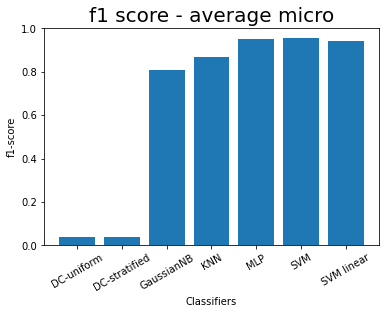

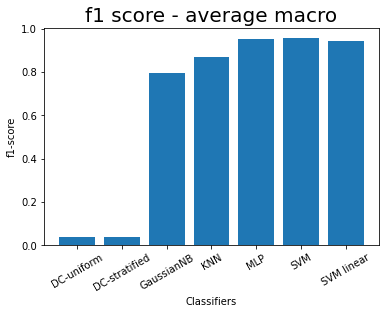

In [ ]:
f1_macro_list1=[f1_macro_DC[0], f1_macro_DC[1], f1_macro_nb, f1_macro_knn, f1_macro_mlp, f1_macro_svm,f1_macro_svm_linear]
f1_micro_list1=[f1_micro_DC[0], f1_micro_DC[1],f1_micro_nb, f1_micro_knn, f1_micro_mlp, f1_micro_svm,f1_micro_svm_linear]
#Bar plot for f1 score - average micro
plot_bar(classifiers, f1_micro_list1,'f1 score - average micro')

#Bar plot for f1 score - average macro
plot_bar(classifiers, f1_macro_list1,'f1 score - average macro')

**3. Σχολιάστε τα αποτελέσματα των plots και των τιμών precision, recall, f1 των πινάκων σύγχυσης.**

In [ ]:
precision_DC_micro = []
precision_DC_macro = []
recall_DC_micro = []
recall_DC_macro = []
for i in range(0,len(preds_DC)):
    prec_micro, prec_macro = precision(y_test, preds_DC[i])
    precision_DC_micro.append(prec_micro)
    precision_DC_macro.append(prec_macro)
    rec_micro, rec_macro = recall(y_test, preds_DC[i])
    recall_DC_micro.append(rec_micro)
    recall_DC_macro.append(rec_macro)

precision_nb_micro, precision_nb_macro = precision(y_test, preds_nb)
recall_nb_micro, recall_nb_macro = recall(y_test, preds_nb)

precision_knn_micro, precision_knn_macro = precision(y_test, preds_knn)
recall_knn_micro, recall_knn_macro = recall(y_test, preds_knn)

precision_mlp_micro, precision_mlp_macro = precision(y_test, preds_mlp)
recall_mlp_micro, recall_mlp_macro = recall(y_test, preds_mlp)

precision_svm_micro, precision_svm_macro = precision(y_test, preds_svm)
recall_svm_micro, recall_svm_macro = recall(y_test, preds_svm)

precision_svm_linear_micro, precision_svm_linear_macro = precision(y_test, preds_svm_linear)
recall_svm_linear_micro, recall_svm_linear_macro = recall(y_test, preds_svm_linear)

precision_micro_list1 = [precision_DC_micro[0], precision_DC_micro[1],precision_nb_micro, precision_knn_micro,precision_mlp_micro,precision_svm_micro,precision_svm_linear_micro]
precision_macro_list1 = [precision_DC_macro[0], precision_DC_macro[1],precision_nb_macro, precision_knn_macro,precision_mlp_macro,precision_svm_macro,precision_svm_linear_macro]
recall_micro_list1 = [recall_DC_micro[0], recall_DC_micro[1], recall_nb_micro, recall_knn_micro,recall_mlp_micro,recall_svm_micro,recall_svm_linear_micro]
recall_macro_list1 = [recall_DC_macro[0], recall_DC_macro[1], recall_nb_macro, recall_knn_macro,recall_mlp_macro,recall_svm_macro,recall_svm_linear_macro]

In [ ]:
data1 = {
        'Precision-micro average': precision_micro_list1,
        'Precision-macro average': precision_macro_list1,
        'Recall-micro average': recall_micro_list1,
        'Recall-macro average': recall_macro_list1,
        'f1 score-micro average': f1_micro_list1,
        'f1 score-macro average': f1_macro_list1}

In [ ]:
df1 = pd.DataFrame(data1, index = classifiers,columns = ['Precision-micro average', 'Precision-macro average', 'Recall-micro average','Recall-macro average', 'f1 score-micro average', 'f1 score-macro average'])
df1

,Precision-micro average,Precision-macro average,Recall-micro average,Recall-macro average,f1 score-micro average,f1 score-macro average
DC-uniform,0.038034,0.038126,0.038034,0.037977,0.038034,0.037909
DC-stratified,0.037607,0.037549,0.037607,0.037626,0.037607,0.037239
GaussianNB,0.807265,0.834517,0.807265,0.806096,0.807265,0.797262
KNN,0.866667,0.876504,0.866667,0.869128,0.866667,0.867732
MLP,0.950427,0.951121,0.950427,0.950683,0.950427,0.950707
SVM,0.954274,0.955574,0.954274,0.954938,0.954274,0.954752
SVM linear,0.942735,0.943088,0.942735,0.942748,0.942735,0.942643


**Σχολιασμός Αποτελεσμάτων:**

Με την πληροφορία που μας δίνει ο πίνακας σύγχυσης για κάθε ταξινομητή, χρησιμοποιώντας τους κατάλληλους τύπους υπολογίζεται το precision, το recall και στη συνέχεια το f1-score του κάθε ταξινομητή. Αναλυτικά:

**Uniform:**
Ο ταξινομητής αυτός ταξινομεί με τυχαίο ομοιόμορφο τρόπο τα δείγματα του συνόλου ελέγχου στις δύο κλάσεις. Όπως φαίνεται από τον πίνακα σύγχυσης, οι προβλέψεις είναι πρακτικά τυχαίες. Έχουμε πάρα πολλά FPs και FNs πράγμα που σημαίνει ότι έχουμε πάρα πολύ χαμηλό precision, recall και επομένως accuracy.<br>
**Stratified:**
Ο ταξινομητής αυτός ταξινομεί με βάση τη συχνότητα εμφάνισης των δειγμάτων στις κλάσεις στο training set. Στο συγκεκριμένο dataset όλες οι κλάσεις εμφανίζονται με την ίδια συχνότητα. Όπως είναι λογικό, με τόσες πολλές κλάσεις και τυχαίες προβλέψεις, ο ταξινομητής κατηγοριοποιεί τα δείγματα πολύ κακά. Έχουμε πολύ ψηλή τιμή FNs και FPs πράγμα που σημαίνει πολύ χαμηλή ακρίβεια, και πολύ χαμηλή ανάκληση.<br>
**Gaussian NB:**
Ο ταξινομητής υποθέτει ότι κάθε χαρακτηριστικό είναι ανεξάρτητο από τα υπόλοιπα, πράγμα που δεν ισχύει πάντα, αλλά σε γενικές γραμμές προσφέρει μια αρκετά καλή εκτίμηση. Οι τιμές που βρίσκονται εκτός της κύριας διαγωνίου του πίνακα είναι σχετικά λίγες. Αυτό σημαίνει αρκετά καλό precision και recall. Είναι πολλαπλάσια καλύτερος απο τους dummy classifiers (περίπου 80% επιτυχία) αλλά λίγο χειρότερος απο τους υπόλοιπους ταξινομητές μας.<br>
**kNN:** H ταξινόμηση που κάνει είναι πολύ ικανοποιητική (περίπου 87% επιτυχία) , λαμβάνοντας υπόψιν ότι η υπερπαράμετρος k έχει επιλεγεί τυχαία και δεν έχει υπολογισθεί η βέλτιστη. Έχει ψηλό recall και precision και έχει πολύ ικανοποιητικό accuracy. <br>
**MLP** : Όπως μπορούμε να δούμε οι τιμές εκτός της κύριας διαγωνίου του πίνακα σύγχησης είναι ελάχιστες. Ο ταξινομητής πετυγχαίνει πάρα πολύ καλό precision και recall, με αποτέλεσμα accuracy ακόμα καλύτερο από τους προηγούμενους (95%).<br>
**SVM** :Συνολικά είναι καλύτερος ταξινομητής με ελάχιστη διαφορά από τον MLP. To precision και το recall είναι στα ίδια επίπεδα με τον MLP, με ένα ελάχιστο πλεονέκτημα 0,3% σύμφωνα και με τις δύο μετρικές.
<br><br>
**Σύγκριση Plots – F1 Scores**
Όπως μπορούμε να δούμε στα δύο ραβδοδιαγράμματα, τα f1-scores των μεθόδων διαφέρουν ελάχιστα, ανάλογα με το αν έχουν υπολογιστεί χρησιμοποιώντας την μέθοδο macro ή micro. Γι αυτό ακριβώς το λόγο συμβουλευόμαστε και τα δύο για να έχουμε μια καλύτερη εικόνα. Παρατηρούμε ότι στους δύο dummy classifiers, έχουμε πάρα πολύ χαμηλά ποσοστά ευστοχίας και με τις δύο μετρικές, πράγμα αναμενόμενο αφού πρόκειται για εντελώς τυχαία κατηγοριοποίηση των δειγμάτων. Οι υπόλοιποι τέσσερις ταξινομητές μας δίνουν όλοι πολύ καλά αποτελέσματα, κάποιοι καλύτερα από άλλους. Ο Gaussian NB είναι ο χειρότερος από τους "έξυπνους" ταξινομητές. Ο kNN με τυχαία υπερπαράμετρο k είναι καλύτερος του GNB. Τέλος, οι δύο ταξινομητές MLP και SVM έχουν πολύ ψηλά ποσοστά ευστοχίας και ελάχιστη διαφορά μεταξύ τους. Είναι σαφώς ανώτεροι από όλους τους υπόλοιπους.

## Βελτιστοποίηση ταξινομητών

### Δ. Βελτιστοποίηση ταξινομητών


1. **Για κάθε ταξινομητή βελτιστοποιήστε την απόδοσή του στο training set μέσω της διαδικασίας προεπεξεργασίας και εύρεσης βέλτιστων υπερπαραμέτρων (δεν έχουν όλοι οι ταξινομητές υπερπαραμέτρους). Κάντε εκτίμηση στο test set (μαζί με τους dummy) και τυπώστε για κάθε estimator: confusion matrix, f1-micro average και f1-macro average.** <br>

Θα γίνει βελτιστοποίηση στους ταξινομητές **GNB, kNN, MLP** και **SVC** που χρησιμοποιήσαμε παραπάνω. Αυτό το πετυγχαίνουμε βρίσκοντας τα στάδια προεπεξεργασίας (με τη χρήση pipelines) και τις υπερπαραμέτρους (με τη χρήση grid-search) για τον καθένα ξεχωριστά ώστε να πετυχαίνουν όσο το δυνατόν υψηλότερη απόδοση.

In [ ]:
# Normalized dataset
flag=0
for i in range(0,isolet.shape[0]):
    for j in range(0,isolet.shape[1]-1):
        if isolet.values[i,j]<0 or isolet.values[i,j]>1 :
            flag=1
            break
if (flag):
    print("Non Normalized dataset")
else:
    print("Normalized dataset")

Non Normalized dataset


In [ ]:
# αρχικοποιούμε τον εκτιμητή (ταξινομητής) και τους μετασχηματιστές χωρίς υπερ-παραμέτρους
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()
clf = KNeighborsClassifier(n_jobs=-1) # η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή
finall_pipes = {}

In [ ]:
kNN = KNeighborsClassifier(n_neighbors = 5)
gnb = GaussianNB()
svm = SVC()
svm_lin = LinearSVC()
mlp = MLPClassifier()

#metakinisi apo pio kato gia na treksi o kodikas
vthreshold = [0, 0.01, 0.05, 0.1, 0.3] 
n_components = [50,100,150,200]

classifier = [kNN,gnb,mlp,svm,svm_lin]  
name = ['kNN','gnb','mlp','svc','svc_lin']

param = {}

for i in range(0,len(classifier)):
    pipes = []
    print(i,name[i],classifier[i])
    
    pipe1 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), (name[i], classifier[i])])
    pipe2 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), (name[i], classifier[i])]) #without ros
    pipe3 = Pipeline(steps=[('selector', selector),(name[i], classifier[i])])
    pipe4 = Pipeline(steps=[('selector', selector), ('sampler', ros), (name[i], classifier[i])])
    pipe5 = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), (name[i], classifier[i])]) #without pca
    pipe6 = Pipeline(steps=[('scaler', scaler), ('sampler', ros), ('pca', pca), (name[i], classifier[i])]) #without selector
    pipe7 = Pipeline(steps=[('selector', selector), ('sampler', ros), ('pca', pca), (name[i], classifier[i])])
    pipe8 = Pipeline(steps=[('sampler', ros), ('pca', pca), (name[i], classifier[i])])
    pipe9 = Pipeline(steps=[('sampler', ros), (name[i], classifier[i])])
    pipe10 = Pipeline(steps=[('pca', pca), (name[i],classifier[i])])

    
    pipes.append(pipe1)
    pipes.append(pipe2)
    pipes.append(pipe3)
    pipes.append(pipe4)
    pipes.append(pipe5)
    pipes.append(pipe6)
    pipes.append(pipe7)
    pipes.append(pipe8)
    pipes.append(pipe9)
    
    pipe_param = [{'selector__threshold':vthreshold, 'pca__n_components':n_components},
              {'selector__threshold':vthreshold, 'pca__n_components':n_components},
              {'selector__threshold':vthreshold},
              {'selector__threshold':vthreshold},
              {'selector__threshold':vthreshold,},
              {'pca__n_components':n_components},
              {'selector__threshold':vthreshold, 'pca__n_components':n_components},
              {'pca__n_components':n_components},
              {},
              {'pca__n_components':n_components}]
    
    
    score = 0
    for pipe in pipes:
        pipe.fit(X_train,y_train)
        pipe_preds = pipe.predict(X_test)
        c = classification_report(y_test, pipe_preds, output_dict=True)
        #print(classification_report(y_test, pipe_preds))
        if c['accuracy']>score:
            score = c['accuracy']
            finall_pipes[name[i]] = pipe
    print("Selected pipeline:", finall_pipes[name[i]])
    print("with accuracy: ", score)
    param[name[i]] = pipe_param[pipes.index(finall_pipes[name[i]])]
    print("Parameters:",param)
print(param)


0 kNN KNeighborsClassifier()
Selected pipeline: Pipeline(steps=[('selector', VarianceThreshold()),
                ('sampler', RandomOverSampler()), ('pca', PCA()),
                ('kNN', KNeighborsClassifier())])
with accuracy:  0.8675213675213675
Parameters: {'kNN': {'selector__threshold': [0, 0.01, 0.05, 0.1, 0.3], 'pca__n_components': [50, 100, 150, 200]}}
1 gnb GaussianNB()
Selected pipeline: Pipeline(steps=[('selector', VarianceThreshold()), ('gnb', GaussianNB())])
with accuracy:  0.8072649572649573
Parameters: {'kNN': {'selector__threshold': [0, 0.01, 0.05, 0.1, 0.3], 'pca__n_components': [50, 100, 150, 200]}, 'gnb': {'selector__threshold': [0, 0.01, 0.05, 0.1, 0.3]}}
2 mlp MLPClassifier()
Selected pipeline: Pipeline(steps=[('sampler', RandomOverSampler()), ('mlp', MLPClassifier())])
with accuracy:  0.9576923076923077
Parameters: {'kNN': {'selector__threshold': [0, 0.01, 0.05, 0.1, 0.3], 'pca__n_components': [50, 100, 150, 200]}, 'gnb': {'selector__threshold': [0, 0.01, 0.05, 0

/home/maria/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/maria/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/maria/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/maria/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/maria/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the 

Selected pipeline: Pipeline(steps=[('selector', VarianceThreshold()), ('svc_lin', LinearSVC())])
with accuracy:  0.9427350427350427
Parameters: {'kNN': {'selector__threshold': [0, 0.01, 0.05, 0.1, 0.3], 'pca__n_components': [50, 100, 150, 200]}, 'gnb': {'selector__threshold': [0, 0.01, 0.05, 0.1, 0.3]}, 'mlp': {}, 'svc': {'selector__threshold': [0, 0.01, 0.05, 0.1, 0.3], 'pca__n_components': [50, 100, 150, 200]}, 'svc_lin': {'selector__threshold': [0, 0.01, 0.05, 0.1, 0.3]}}
{'kNN': {'selector__threshold': [0, 0.01, 0.05, 0.1, 0.3], 'pca__n_components': [50, 100, 150, 200]}, 'gnb': {'selector__threshold': [0, 0.01, 0.05, 0.1, 0.3]}, 'mlp': {}, 'svc': {'selector__threshold': [0, 0.01, 0.05, 0.1, 0.3], 'pca__n_components': [50, 100, 150, 200]}, 'svc_lin': {'selector__threshold': [0, 0.01, 0.05, 0.1, 0.3]}}


/home/maria/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# GridsearchCV

In [ ]:
vthreshold = [0, 0.01, 0.05, 0.1, 0.3] #προσαρμόζουμε τις τιμές μας στο variance που παρατηρήσαμε


#KNN
n_neighbors = [1, 5, 10, 15, 20, 25, 30] # η υπερπαράμετρος του ταξινομητή
weights = ['uniform','distance']
metric = ['minkowski','manhattan', 'euclidean']

#MLP
hidden_layer_sizes = [(50,),(75,),(100,),(125)]
activation = ['identity','logistic', 'tanh', 'relu']
solver = ['lbfgs', 'sgd', 'adam']
max_iter = [150,200,250,350,500]
learning_rate = ['constant','invscaling','adaptive']
alpha = [0.00005,0.0001,0.0005]

#SVM
loss = ['hinge', 'squared_hinge']
C = [0.1,1,10,100]
degree = [0,1,2,3,4,5,6]
gamma = ['scale','auto']
tol = [0.1,1,0.01]
kernel = ['poly', 'rbf']

estimators_micro = []
estimators_macro = []

best_estimators_macro = {}
best_parameters_macro = {}

best_estimators_micro = {}
best_parameters_micro = {}

estimator_scores_micro = {}
estimator_scores_macro = {}

In [ ]:
parameters_gnb = param['gnb']
#no hpyerparameters
    
parameters_knn = param['kNN']
parameters_knn.update({'kNN__n_neighbors':n_neighbors , 'kNN__weights':weights,'kNN__metric':metric})

parameters_mlp = param['mlp']
parameters_mlp.update({'mlp__hidden_layer_sizes':hidden_layer_sizes, 'mlp__activation':activation, 
                                        'mlp__solver':solver, 'mlp__learning_rate':learning_rate, 'mlp__alpha':alpha, 
                                        'mlp__max_iter':max_iter})


    
parameters_svc = param['svc']
parameters_svc.update({'svc__C': C ,'svc__kernel':kernel, 'svc__tol':tol, 'svc__degree' : degree , 'svc__gamma':gamma})
print(parameters_svc)


parameters_svc_lin = param['svc_lin']
parameters_svc_lin.update({'svc_lin__loss': loss, 'svc_lin__tol': tol,'svc_lin__C': C})

    

{'selector__threshold': [0, 0.01, 0.05, 0.1, 0.3], 'pca__n_components': [50, 100, 150, 200], 'svc__C': [0.1, 1, 10, 100], 'svc__kernel': ['poly', 'rbf'], 'svc__tol': [0.1, 1, 10], 'svc__degree': [0, 1, 2, 3, 4, 5, 6], 'svc__gamma': ['scale', 'auto']}


In [ ]:
#GNB
#Macro

estimator_gnb_macro = GridSearchCV(finall_pipes['gnb'],parameters_gnb,cv=5, scoring='f1_macro', n_jobs=-1,verbose=10)

estimator_gnb_macro.fit(X_train, y_train)

preds_gnb_best_macro = estimator_gnb_macro.predict(X_test)

print(classification_report(y_test, preds_gnb_best_macro))
print(estimator_gnb_macro.best_estimator_)
print(estimator_gnb_macro.best_params_)
best_estimators_macro['gnb'] = estimator_gnb_macro.best_estimator_
best_parameters_macro['gnb'] = estimator_gnb_macro.best_params_

#MICRO
estimator_gnb_micro = GridSearchCV(finall_pipes['gnb'],parameters_gnb,cv=5, scoring='f1_micro', n_jobs=-1,verbose=10)

estimator_gnb_micro.fit(X_train, y_train)

preds_gnb_best_micro = estimator_gnb_micro.predict(X_test)


print(classification_report(y_test, preds_gnb_best_micro))
print(estimator_gnb_micro.best_estimator_)
print(estimator_gnb_micro.best_params_)
best_estimators_micro['gnb'] = estimator_gnb_micro.best_estimator_
best_parameters_micro['gnb'] = estimator_gnb_micro.best_params_




Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:    6.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    7.0s finished


              precision    recall  f1-score   support

         1.0       0.94      0.92      0.93        88
         2.0       0.68      0.54      0.60        85
         3.0       0.97      0.97      0.97        96
         4.0       0.83      0.73      0.78        95
         5.0       0.63      0.82      0.71       103
         6.0       0.90      0.74      0.81        88
         7.0       0.78      0.78      0.78        80
         8.0       0.96      0.99      0.98       103
         9.0       0.93      0.94      0.93        82
        10.0       0.89      0.87      0.88        84
        11.0       0.95      0.91      0.93       108
        12.0       0.90      0.95      0.92        93
        13.0       0.88      0.58      0.70        91
        14.0       0.70      0.92      0.80       100
        15.0       0.97      0.87      0.92        86
        16.0       0.82      0.66      0.73        90
        17.0       0.93      0.99      0.96        93
        18.0       0.95    

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed:    4.7s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    4.9s finished


              precision    recall  f1-score   support

         1.0       0.94      0.92      0.93        88
         2.0       0.68      0.54      0.60        85
         3.0       0.97      0.97      0.97        96
         4.0       0.83      0.73      0.78        95
         5.0       0.63      0.82      0.71       103
         6.0       0.90      0.74      0.81        88
         7.0       0.78      0.78      0.78        80
         8.0       0.96      0.99      0.98       103
         9.0       0.93      0.94      0.93        82
        10.0       0.89      0.87      0.88        84
        11.0       0.95      0.91      0.93       108
        12.0       0.90      0.95      0.92        93
        13.0       0.88      0.58      0.70        91
        14.0       0.70      0.92      0.80       100
        15.0       0.97      0.87      0.92        86
        16.0       0.82      0.66      0.73        90
        17.0       0.93      0.99      0.96        93
        18.0       0.95    

Υπολογισμός χρόνων για GNB

In [ ]:
#macro
temp_selector = VarianceThreshold(threshold=estimator_gnb_macro.best_params_['selector__threshold'])
X_train_copy = temp_selector.fit_transform(X_train)
X_test_copy = temp_selector.transform(X_test)

gnb_macro = GaussianNB()

t0 = time.time()
gnb_macro.fit(X_train_copy, y_train)
time_train_gnb_macro = time.time() - t0

t0 = time.time()
preds_gnb_best_macro = gnb_macro.predict(X_test_copy)
time_preds_gnb_macro = time.time() - t0

#micro
temp_selector = VarianceThreshold(threshold=estimator_gnb_micro.best_params_['selector__threshold'])
X_train_copy = temp_selector.fit_transform(X_train)
X_test_copy = temp_selector.transform(X_test)

gnb_micro = GaussianNB()

t0 = time.time()
gnb_micro.fit(X_train_copy, y_train)
time_train_gnb_micro = time.time() - t0

t0 = time.time()
preds_gnb_best_micro = gnb_micro.predict(X_test_copy)
time_preds_gnb_micro = time.time() - t0

Αποθήκευση των μετρικών (precision,recall,f-score)που προέκυψαν απο τη διαδικασία βελτιστοποίησης.

In [ ]:
estimator_scores_micro['gnb'] = [precision_recall_fscore_support(y_test, preds_gnb_best_micro, average='micro')[0],
                                 precision_recall_fscore_support(y_test, preds_gnb_best_micro, average='micro')[1],
                                 precision_recall_fscore_support(y_test, preds_gnb_best_micro, average='micro')[2]]
estimator_scores_macro['gnb'] = [precision_recall_fscore_support(y_test, preds_gnb_best_macro, average='macro')[0],
                                 precision_recall_fscore_support(y_test, preds_gnb_best_macro, average='macro')[1],
                                 precision_recall_fscore_support(y_test, preds_gnb_best_macro, average='macro')[2]]

print("Macro")
print(precision_recall_fscore_support(y_test, preds_gnb_best_macro, average='micro'))
print("Micro")
print(precision_recall_fscore_support(y_test, preds_gnb_best_micro, average='micro'))


Macro
(0.8581196581196581, 0.8581196581196581, 0.8581196581196581, None)
Micro
(0.8581196581196581, 0.8581196581196581, 0.8581196581196581, None)


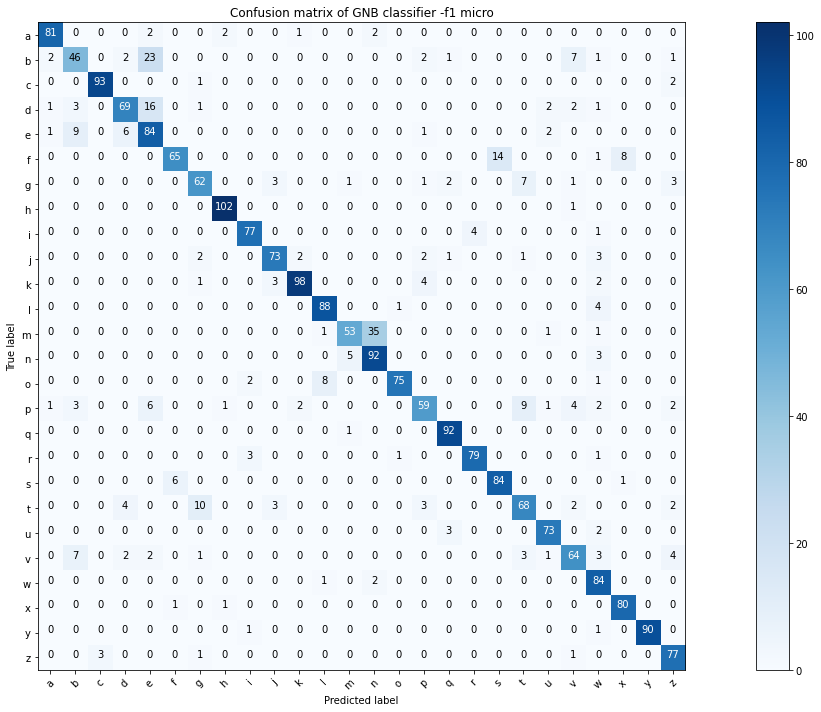

In [ ]:
cnf_matrix = confusion_matrix(y_test, preds_gnb_best_micro)
plot_confusion_matrix(cnf_matrix, ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"], 'Confusion matrix of GNB classifier -f1 micro')

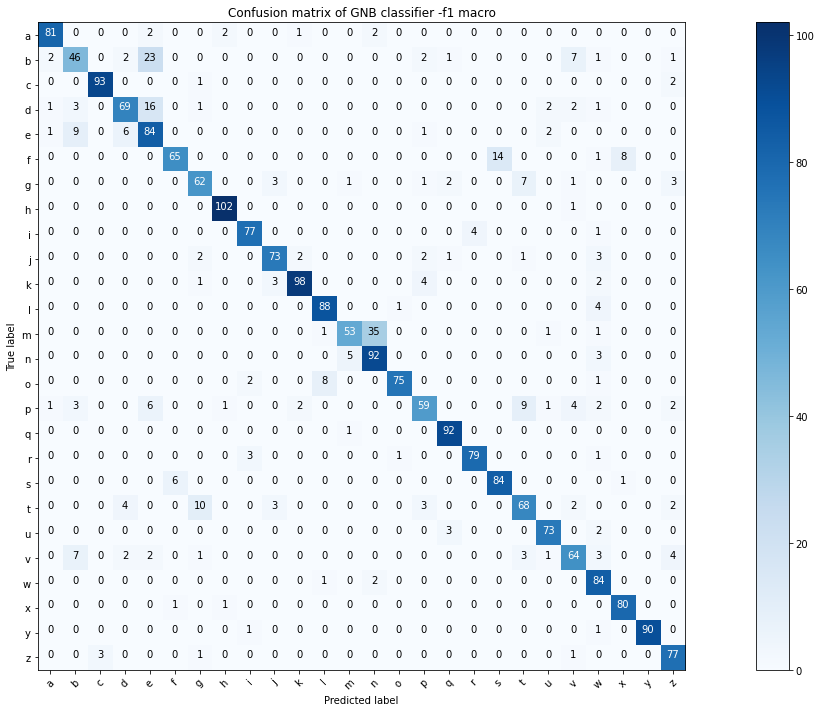

In [ ]:
cnf_matrix = confusion_matrix(y_test, preds_gnb_best_macro)
plot_confusion_matrix(cnf_matrix, ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"], 'Confusion matrix of GNB classifier -f1 macro')

In [ ]:
#kNN
print(finall_pipes['kNN'])
print(parameters_knn)

#Macro
estimator_knn_macro = GridSearchCV(finall_pipes['kNN'],parameters_knn,cv=5, scoring='f1_macro', n_jobs=-1, verbose = 10)

estimator_knn_macro.fit(X_train, y_train)

preds_knn_best_macro = estimator_knn_macro.predict(X_test)

print(classification_report(y_test, preds_knn_best_macro))
print(estimator_knn_macro.best_estimator_)
print(estimator_knn_macro.best_params_)
best_estimators_macro['kNN'] = estimator_knn_macro.best_estimator_
best_parameters_macro['kNN'] = estimator_knn_macro.best_params_

#Micro
estimator_knn_micro = GridSearchCV(finall_pipes['kNN'],parameters_knn,cv=5, scoring='f1_micro', n_jobs=-1, verbose = 10)
 
estimator_knn_micro.fit(X_train, y_train)

preds_knn_best_micro = estimator_knn_micro.predict(X_test)

print(classification_report(y_test, preds_knn_best_micro))
print(estimator_knn_micro.best_estimator_)
print(estimator_knn_micro.best_params_)
best_estimators_micro['kNN'] = estimator_knn_micro.best_estimator_
best_parameters_micro['kNN'] = estimator_knn_micro.best_params_

Pipeline(steps=[('selector', VarianceThreshold()),
                ('sampler', RandomOverSampler()), ('pca', PCA()),
                ('kNN', KNeighborsClassifier())])
{'selector__threshold': [0, 0.01, 0.05, 0.1, 0.3], 'pca__n_components': [50, 100, 150, 200], 'kNN__n_neighbors': [1, 5, 10, 15, 20, 25, 30], 'kNN__weights': ['uniform', 'distance'], 'kNN__metric': ['minkowski', 'manhattan', 'euclidean']}
Fitting 5 folds for each of 840 candidates, totalling 4200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   41.7s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   55.8s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1

              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94        88
         2.0       0.62      0.87      0.72        85
         3.0       0.89      0.97      0.93        96
         4.0       0.78      0.88      0.83        95
         5.0       0.88      0.74      0.80       103
         6.0       0.91      0.98      0.94        88
         7.0       0.75      0.86      0.80        80
         8.0       1.00      0.99      1.00       103
         9.0       0.98      0.98      0.98        82
        10.0       0.75      0.92      0.82        84
        11.0       0.91      0.84      0.87       108
        12.0       0.94      1.00      0.97        93
        13.0       0.89      0.86      0.87        91
        14.0       0.89      0.85      0.87       100
        15.0       0.99      0.97      0.98        86
        16.0       0.77      0.76      0.76        90
        17.0       0.90      0.97      0.93        93
        18.0       0.97    

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1

              precision    recall  f1-score   support

         1.0       0.93      0.94      0.94        88
         2.0       0.65      0.89      0.75        85
         3.0       0.88      0.97      0.92        96
         4.0       0.76      0.87      0.81        95
         5.0       0.90      0.77      0.83       103
         6.0       0.97      0.98      0.97        88
         7.0       0.80      0.89      0.84        80
         8.0       1.00      0.98      0.99       103
         9.0       0.99      1.00      0.99        82
        10.0       0.78      0.94      0.85        84
        11.0       0.92      0.86      0.89       108
        12.0       0.96      0.99      0.97        93
        13.0       0.82      0.85      0.83        91
        14.0       0.87      0.80      0.83       100
        15.0       0.99      1.00      0.99        86
        16.0       0.78      0.74      0.76        90
        17.0       0.95      0.98      0.96        93
        18.0       0.98    

Υπολογισμός χρόνων για kNN

In [ ]:
#macro
temp_selector = VarianceThreshold(threshold=estimator_knn_macro.best_params_['selector__threshold'])
X_train_copy = temp_selector.fit_transform(X_train)
X_test_copy = temp_selector.transform(X_test)

pca = PCA(n_components = estimator_knn_macro.best_params_['pca__n_components'])
X_train_copy = pca.fit_transform(X_train_copy)
X_test_copy = pca.transform(X_test_copy)

knn_macro = KNeighborsClassifier(n_neighbors = estimator_knn_macro.best_params_['kNN__n_neighbors'],
                                weights = estimator_knn_macro.best_params_['kNN__weights'],
                                metric = estimator_knn_macro.best_params_['kNN__metric'])

t0 = time.time() 
knn_macro.fit(X_train_copy, y_train)
time_train_knn_macro = time.time() - t0

t0 = time.time() 
preds_knn_best_macro = knn_macro.predict(X_test_copy)
time_preds_knn_macro = time.time() - t0

#micro
temp_selector = VarianceThreshold(threshold=estimator_knn_micro.best_params_['selector__threshold'])
X_train_copy = temp_selector.fit_transform(X_train)
X_test_copy = temp_selector.transform(X_test)

pca = PCA(n_components = estimator_knn_micro.best_params_['pca__n_components'])
X_train_copy = pca.fit_transform(X_train_copy)
X_test_copy = pca.transform(X_test_copy)

knn_micro = KNeighborsClassifier(n_neighbors = estimator_knn_micro.best_params_['kNN__n_neighbors'],
                                weights = estimator_knn_micro.best_params_['kNN__weights'],
                                metric = estimator_knn_micro.best_params_['kNN__metric'])

t0 = time.time() 
knn_micro.fit(X_train_copy, y_train)
time_train_knn_micro = time.time() - t0

t0 = time.time() 
preds_knn_best_micro = knn_micro.predict(X_test_copy)
time_preds_knn_micro = time.time() - t0

Αποθήκευση των μετρικών (precision,recall,f-score)που προέκυψαν απο τη διαδικασία βελτιστοποίησης.

In [ ]:
estimator_scores_micro['kNN'] = [precision_recall_fscore_support(y_test, preds_knn_best_micro, average='micro')[0],
                                 precision_recall_fscore_support(y_test, preds_knn_best_micro, average='micro')[1],
                                 precision_recall_fscore_support(y_test, preds_knn_best_micro, average='micro')[2]]
estimator_scores_macro['kNN'] = [precision_recall_fscore_support(y_test, preds_knn_best_macro, average='macro')[0],
                                 precision_recall_fscore_support(y_test, preds_knn_best_macro, average='macro')[1],
                                 precision_recall_fscore_support(y_test, preds_knn_best_macro, average='macro')[2]]

print(precision_recall_fscore_support(y_test, preds_knn_best_micro, average='macro'))
print(precision_recall_fscore_support(y_test, preds_knn_best_micro, average='macro')[2])
print(precision_recall_fscore_support(y_test, preds_knn_best_micro, average='micro'))
print(precision_recall_fscore_support(y_test, preds_knn_best_micro, average='micro')[2])


(0.9073958453904546, 0.9035961287361728, 0.902228379487735, None)
0.902228379487735
(0.9017094017094017, 0.9017094017094017, 0.9017094017094017, None)
0.9017094017094017


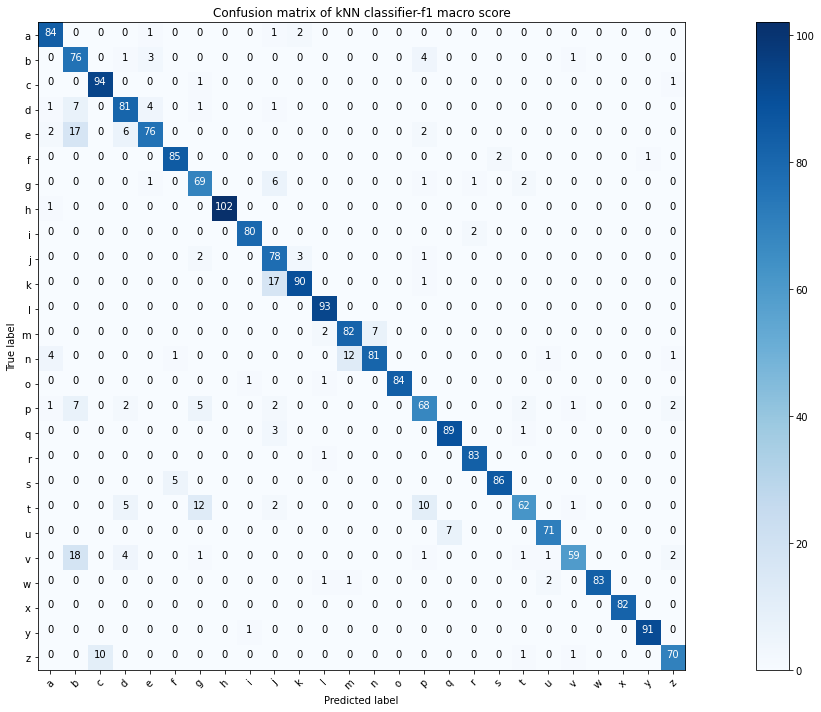

In [ ]:
cnf_matrix = confusion_matrix(y_test, preds_knn_best_macro)
plot_confusion_matrix(cnf_matrix, ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"], 'Confusion matrix of kNN classifier-f1 macro score')

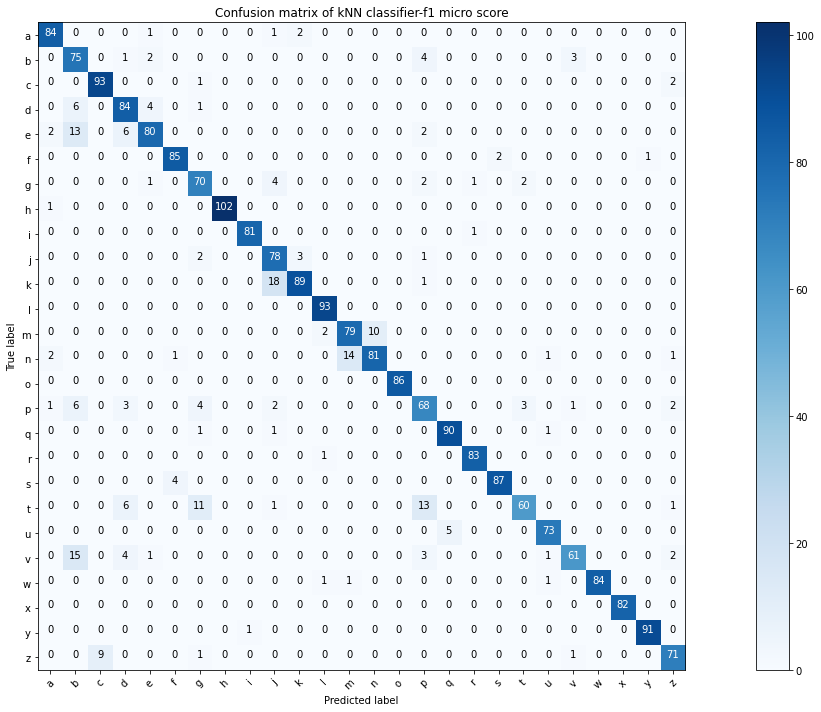

In [ ]:
cnf_matrix = confusion_matrix(y_test, preds_knn_best_micro)
plot_confusion_matrix(cnf_matrix, ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"], 'Confusion matrix of kNN classifier-f1 micro score')

## Σημείωση:

Λόγω του ότι το GridSearch πάνω στο dataset μας χρειαζόταν πάρα πολύ χρόνο για να τρέξει, αναγκαστήκαμε να το τρέξουμε πάνω σε 2000 από τα 7797 δείγματα και να χρησιμοποιήσουμε τις παραμέτρους που προέκυψαν από τη μέθοδο, σε ολόκληρο το dataset.

In [ ]:
X_train_sample, y_train_sample = shuffle(X_train, y_train, random_state=3)

X_train_sample = X_train_sample[0:2000][:]
y_train_sample = y_train_sample[0:2000]

In [ ]:
#mlp
#MACRO
estimator_mlp_macro = GridSearchCV(finall_pipes['mlp'], parameters_mlp, cv=5, scoring='f1_macro', n_jobs=-1, verbose = 10)

estimator_mlp_macro.fit(X_train_sample, y_train_sample)

preds_mlp_best_macro = estimator_mlp_macro.predict(X_test)

print(classification_report(y_test, preds_mlp_best_macro))
print(estimator_mlp_macro.best_estimator_)
print(estimator_mlp_macro.best_params_)
best_estimators_macro['mlp'] = estimator_mlp_macro.best_estimator_
best_parameters_macro['mlp'] = estimator_mlp_macro.best_params_

#MICRO
estimator_mlp_micro = GridSearchCV(finall_pipes['mlp'], parameters_mlp, cv=5, scoring='f1_micro', n_jobs=-1, verbose =10)

estimator_mlp_micro.fit(X_train_sample, y_train_sample)

preds_mlp_best_micro = estimator_mlp_micro.predict(X_test)

print(classification_report(y_test, preds_mlp_best_micro))
print(estimator_mlp_micro.best_estimator_)
print(estimator_mlp_micro.best_params_)
best_estimators_micro['mlp'] = estimator_mlp_micro.best_estimator_
best_parameters_micro['mlp'] = estimator_mlp_micro.best_params_


print(classification_report(y_test, preds_mlp_best_micro))
print(estimator_mlp_micro.best_estimator_)
print(estimator_mlp_micro.best_params_)


Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 10

[Parallel(n_jobs=-1)]: Done 8970 tasks      | elapsed: 466.6min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | elapsed: 473.2min
[Parallel(n_jobs=-1)]: Done 9240 tasks      | elapsed: 479.0min
[Parallel(n_jobs=-1)]: Done 9377 tasks      | elapsed: 485.6min
[Parallel(n_jobs=-1)]: Done 9514 tasks      | elapsed: 492.2min
[Parallel(n_jobs=-1)]: Done 9653 tasks      | elapsed: 500.2min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 509.0min
[Parallel(n_jobs=-1)]: Done 9933 tasks      | elapsed: 517.5min
[Parallel(n_jobs=-1)]: Done 10074 tasks      | elapsed: 523.4min
[Parallel(n_jobs=-1)]: Done 10217 tasks      | elapsed: 529.9min
[Parallel(n_jobs=-1)]: Done 10360 tasks      | elapsed: 536.9min
[Parallel(n_jobs=-1)]: Done 10505 tasks      | elapsed: 545.1min
[Parallel(n_jobs=-1)]: Done 10650 tasks      | elapsed: 553.9min
[Parallel(n_jobs=-1)]: Done 10800 out of 10800 | elapsed: 563.8min finished


              precision    recall  f1-score   support

         1.0       0.98      0.99      0.98        88
         2.0       0.81      0.87      0.84        85
         3.0       0.93      0.94      0.93        96
         4.0       0.92      0.92      0.92        95
         5.0       0.85      0.90      0.88       103
         6.0       0.87      0.91      0.89        88
         7.0       0.93      0.93      0.93        80
         8.0       1.00      1.00      1.00       103
         9.0       1.00      0.99      0.99        82
        10.0       0.93      0.96      0.95        84
        11.0       0.97      0.94      0.95       108
        12.0       0.92      0.99      0.95        93
        13.0       0.87      0.95      0.91        91
        14.0       0.97      0.87      0.92       100
        15.0       0.96      0.95      0.96        86
        16.0       0.95      0.82      0.88        90
        17.0       0.98      1.00      0.99        93
        18.0       0.99    

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  6

[Parallel(n_jobs=-1)]: Done 8970 tasks      | elapsed: 517.3min
[Parallel(n_jobs=-1)]: Done 9105 tasks      | elapsed: 525.6min
[Parallel(n_jobs=-1)]: Done 9240 tasks      | elapsed: 532.8min
[Parallel(n_jobs=-1)]: Done 9377 tasks      | elapsed: 541.3min
[Parallel(n_jobs=-1)]: Done 9514 tasks      | elapsed: 550.6min
[Parallel(n_jobs=-1)]: Done 9653 tasks      | elapsed: 562.3min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 574.3min
[Parallel(n_jobs=-1)]: Done 9933 tasks      | elapsed: 585.2min
[Parallel(n_jobs=-1)]: Done 10074 tasks      | elapsed: 591.7min
[Parallel(n_jobs=-1)]: Done 10217 tasks      | elapsed: 599.4min
[Parallel(n_jobs=-1)]: Done 10360 tasks      | elapsed: 606.8min
[Parallel(n_jobs=-1)]: Done 10505 tasks      | elapsed: 615.7min
[Parallel(n_jobs=-1)]: Done 10650 tasks      | elapsed: 624.8min
[Parallel(n_jobs=-1)]: Done 10800 out of 10800 | elapsed: 635.1min finished


              precision    recall  f1-score   support

         1.0       0.98      0.99      0.98        88
         2.0       0.82      0.87      0.85        85
         3.0       0.95      0.96      0.95        96
         4.0       0.95      0.92      0.93        95
         5.0       0.88      0.92      0.90       103
         6.0       0.88      0.90      0.89        88
         7.0       0.93      0.93      0.93        80
         8.0       1.00      1.00      1.00       103
         9.0       0.99      0.99      0.99        82
        10.0       0.92      0.96      0.94        84
        11.0       0.97      0.93      0.95       108
        12.0       0.95      0.98      0.96        93
        13.0       0.88      0.93      0.90        91
        14.0       0.96      0.86      0.91       100
        15.0       0.97      0.98      0.97        86
        16.0       0.92      0.81      0.86        90
        17.0       0.99      0.99      0.99        93
        18.0       0.99    

Εφαρμογή υπερπαραμέτρων σε ολόκληρο το dataset μας

In [ ]:
mlp_macro = MLPClassifier(solver=estimator_mlp_macro.best_params_['mlp__solver'],
                    alpha=estimator_mlp_macro.best_params_['mlp__alpha'],
                    hidden_layer_sizes=estimator_mlp_macro.best_params_['mlp__hidden_layer_sizes'],
                    random_state=1,
                    activation=estimator_mlp_macro.best_params_['mlp__activation'],
                    learning_rate=estimator_mlp_macro.best_params_['mlp__learning_rate'],
                    max_iter=estimator_mlp_macro.best_params_['mlp__max_iter']) 
print(mlp_macro)
t0 = time.time() 
mlp_macro.fit(X_train, y_train)
time_train_mlp_macro = time.time() - t0

t0 = time.time() 
preds_mlp_best_macro = mlp_macro.predict(X_test)
time_preds_mlp_macro = time.time() - t0

print(classification_report(y_test, preds_mlp_best_macro))

MLPClassifier(activation='logistic', alpha=0.0005, hidden_layer_sizes=(75,),
              learning_rate='adaptive', max_iter=350, random_state=1)
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99        88
         2.0       0.85      0.89      0.87        85
         3.0       0.97      0.99      0.98        96
         4.0       0.97      0.92      0.94        95
         5.0       0.92      0.95      0.93       103
         6.0       0.97      0.94      0.95        88
         7.0       0.99      0.96      0.97        80
         8.0       0.99      1.00      1.00       103
         9.0       1.00      1.00      1.00        82
        10.0       0.93      0.96      0.95        84
        11.0       0.98      0.94      0.96       108
        12.0       0.97      0.99      0.98        93
        13.0       0.93      0.96      0.94        91
        14.0       0.96      0.92      0.94       100
        15.0       0.99      1.00      0.9

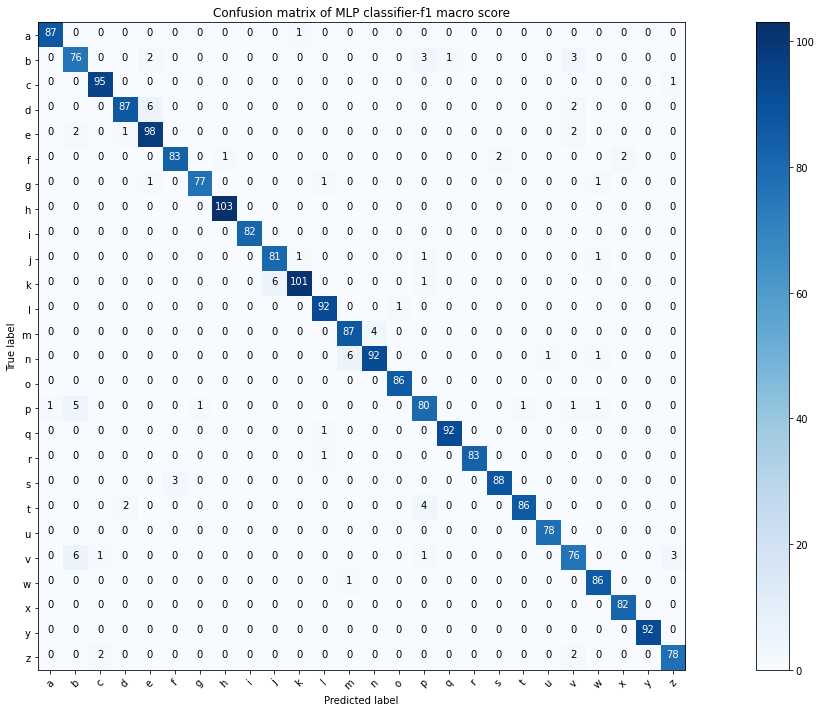

In [ ]:
cnf_matrix = confusion_matrix(y_test, preds_mlp_best_macro)
plot_confusion_matrix(cnf_matrix, ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"], 'Confusion matrix of MLP classifier-f1 macro score')

In [ ]:
mlp_micro = MLPClassifier(solver=estimator_mlp_micro.best_params_['mlp__solver'],
                    alpha=estimator_mlp_micro.best_params_['mlp__alpha'],
                    hidden_layer_sizes=estimator_mlp_micro.best_params_['mlp__hidden_layer_sizes'],
                    random_state=1,
                    activation=estimator_mlp_micro.best_params_['mlp__activation'],
                    learning_rate=estimator_mlp_micro.best_params_['mlp__learning_rate'],
                    max_iter=estimator_mlp_micro.best_params_['mlp__max_iter']) 
print(mlp_micro)
t0 = time.time() 
mlp_micro.fit(X_train, y_train)
time_train_mlp_micro = time.time() - t0

t0 = time.time() 
preds_mlp_best_micro = mlp_micro.predict(X_test)
time_preds_mlp_micro = time.time() - t0

print(classification_report(y_test, preds_mlp_best_micro))

MLPClassifier(activation='logistic', alpha=5e-05, hidden_layer_sizes=(75,),
              learning_rate='adaptive', max_iter=250, random_state=1)
              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99        88
         2.0       0.84      0.89      0.87        85
         3.0       0.97      0.99      0.98        96
         4.0       0.97      0.92      0.94        95
         5.0       0.92      0.94      0.93       103
         6.0       0.97      0.94      0.95        88
         7.0       0.99      0.96      0.97        80
         8.0       0.99      1.00      1.00       103
         9.0       1.00      1.00      1.00        82
        10.0       0.93      0.96      0.95        84
        11.0       0.98      0.94      0.96       108
        12.0       0.97      0.99      0.98        93
        13.0       0.93      0.96      0.94        91
        14.0       0.96      0.92      0.94       100
        15.0       0.99      1.00      0.99

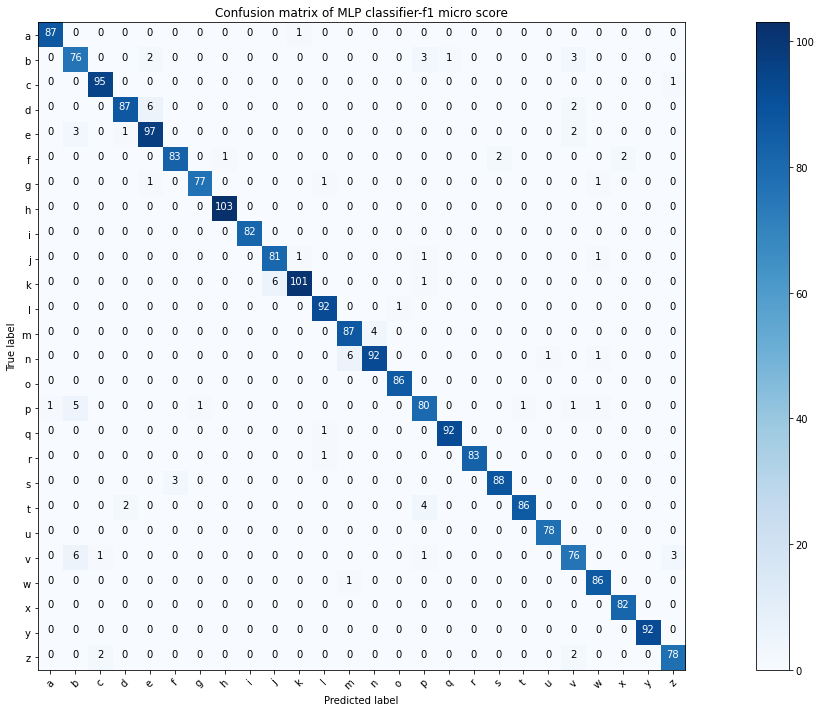

In [ ]:
cnf_matrix = confusion_matrix(y_test, preds_mlp_best_micro)
plot_confusion_matrix(cnf_matrix, ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"], 'Confusion matrix of MLP classifier-f1 micro score')

Αποθήκευση των μετρικών (precision,recall,f-score)που προέκυψαν απο τη διαδικασία βελτιστοποίησης.

In [ ]:
estimator_scores_micro['mlp'] = [precision_recall_fscore_support(y_test, preds_mlp_best_micro, average='micro')[0],
                                 precision_recall_fscore_support(y_test, preds_mlp_best_micro, average='micro')[1],
                                 precision_recall_fscore_support(y_test, preds_mlp_best_micro, average='micro')[2]]
estimator_scores_macro['mlp'] = [precision_recall_fscore_support(y_test, preds_mlp_best_macro, average='macro')[0],
                                 precision_recall_fscore_support(y_test, preds_mlp_best_macro, average='macro')[1],
                                 precision_recall_fscore_support(y_test, preds_mlp_best_macro, average='macro')[2]]

print("Macro")
print(precision_recall_fscore_support(y_test, preds_mlp_best_macro, average='macro'))
print("Micro")
print(precision_recall_fscore_support(y_test, preds_mlp_best_micro, average='micro'))


Macro
(0.961078793413, 0.9612062540834632, 0.9609572214968007, None)
Micro
(0.9602564102564103, 0.9602564102564103, 0.9602564102564103, None)


Όπως και στο MLP, υλοποιούμε Gridsearch με δειγματοληψία σε 2000 δείγματα.

In [ ]:
#svm
#MACRO
estimator_svm_macro = GridSearchCV(finall_pipes['svc'],parameters_svc, cv=5, scoring='f1_macro', n_jobs=-1, verbose = 10)

estimator_svm_macro.fit(X_train_sample, y_train_sample)

preds_svm_best_macro = estimator_svm_macro.predict(X_test)

print(classification_report(y_test, preds_svm_best_macro))
print(estimator_svm_macro.best_estimator_)
print(estimator_svm_macro.best_params_)
best_estimators_macro['svm'] = estimator_svm_macro.best_estimator_
best_parameters_macro['svm'] = estimator_svm_macro.best_params_

#MICRO
estimator_svm_micro = GridSearchCV(finall_pipes['svc'],parameters_svc, cv=5, scoring='f1_micro', n_jobs=-1, verbose = 10)

estimator_svm_micro.fit(X_train_sample, y_train_sample)

preds_svm_best_micro = estimator_svm_micro.predict(X_test)

print(classification_report(y_test, preds_svm_best_micro))
print(estimator_svm_micro.best_estimator_)
print(estimator_svm_micro.best_params_)
best_estimators_micro['svm'] = estimator_svm_micro.best_estimator_
best_parameters_micro['svm'] = estimator_svm_micro.best_params_



Fitting 5 folds for each of 6720 candidates, totalling 33600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 9105 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 9240 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 9377 tasks      | elapsed: 17.0min
[Parallel(n_jobs=-1)]: Done 9514 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 9653 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 9933 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 10074 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 10217 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 10360 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 10505 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 10650 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 10797 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 10944 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 11093 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 11242 tasks      | 

              precision    recall  f1-score   support

         1.0       0.98      0.99      0.98        88
         2.0       0.79      0.87      0.83        85
         3.0       0.95      0.96      0.95        96
         4.0       0.88      0.89      0.89        95
         5.0       0.91      0.89      0.90       103
         6.0       0.91      0.93      0.92        88
         7.0       0.96      0.91      0.94        80
         8.0       1.00      0.99      1.00       103
         9.0       0.99      1.00      0.99        82
        10.0       0.92      0.95      0.94        84
        11.0       0.97      0.94      0.95       108
        12.0       0.98      1.00      0.99        93
        13.0       0.88      0.95      0.91        91
        14.0       0.95      0.89      0.92       100
        15.0       1.00      0.98      0.99        86
        16.0       0.93      0.86      0.89        90
        17.0       1.00      0.98      0.99        93
        18.0       1.00    

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 9105 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 9240 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 9377 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 9514 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 9653 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 9933 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 10074 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 10217 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 10360 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 10505 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 10650 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 10797 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 10944 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 11093 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 11242 tasks      | 

              precision    recall  f1-score   support

         1.0       0.98      0.99      0.98        88
         2.0       0.78      0.85      0.81        85
         3.0       0.95      0.96      0.95        96
         4.0       0.87      0.88      0.87        95
         5.0       0.91      0.90      0.91       103
         6.0       0.91      0.94      0.93        88
         7.0       0.96      0.90      0.93        80
         8.0       1.00      0.99      1.00       103
         9.0       0.99      1.00      0.99        82
        10.0       0.93      0.94      0.93        84
        11.0       0.96      0.94      0.95       108
        12.0       0.98      1.00      0.99        93
        13.0       0.88      0.96      0.92        91
        14.0       0.96      0.89      0.92       100
        15.0       1.00      0.98      0.99        86
        16.0       0.93      0.86      0.89        90
        17.0       1.00      0.98      0.99        93
        18.0       1.00    

Ακολούθως χρησιμοποιούμε τα αποτελέσματα σε ολόκληρο το dataset.

In [ ]:
temp_selector = VarianceThreshold(threshold=estimator_svm_macro.best_params_['selector__threshold'])
X_train_copy = temp_selector.fit_transform(X_train)
X_test_copy = temp_selector.transform(X_test)


pca = PCA(n_components = estimator_svm_macro.best_params_['pca__n_components'])
X_train_copy = pca.fit_transform(X_train_copy)
X_test_copy = pca.transform(X_test_copy)

svm_macro = SVC(C= estimator_svm_macro.best_params_['svc__C'] ,
          tol = estimator_svm_macro.best_params_['svc__tol'],
          degree =estimator_svm_macro.best_params_['svc__degree'],
          gamma = estimator_svm_macro.best_params_['svc__gamma'],
        kernel = estimator_svm_macro.best_params_['svc__kernel'] )

t0 = time.time() 
svm_macro.fit(X_train_copy , y_train)
time_train_svm_macro = time.time() - t0

t0 = time.time() 
preds_svm_best_macro = svm_macro.predict(X_test_copy )
time_preds_svm_macro = time.time() - t0

print(classification_report(y_test, preds_svm_best_macro))


              precision    recall  f1-score   support

         1.0       0.98      0.99      0.98        88
         2.0       0.79      0.89      0.84        85
         3.0       0.96      0.99      0.97        96
         4.0       0.90      0.94      0.92        95
         5.0       0.95      0.93      0.94       103
         6.0       0.95      0.94      0.95        88
         7.0       0.97      0.95      0.96        80
         8.0       1.00      0.99      1.00       103
         9.0       0.99      1.00      0.99        82
        10.0       0.96      0.95      0.96        84
        11.0       0.98      0.94      0.96       108
        12.0       1.00      1.00      1.00        93
        13.0       0.93      0.96      0.94        91
        14.0       0.96      0.94      0.95       100
        15.0       1.00      1.00      1.00        86
        16.0       0.88      0.92      0.90        90
        17.0       0.99      1.00      0.99        93
        18.0       1.00    

In [ ]:
print(f1_micro(y_test, preds_svm_best_macro))

0.961965811965812


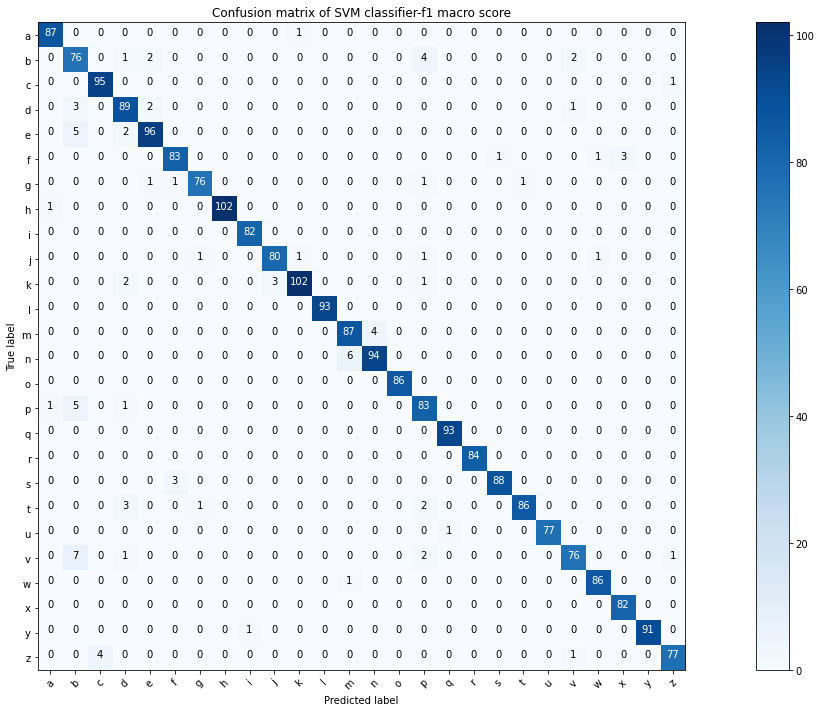

In [ ]:
cnf_matrix = confusion_matrix(y_test, preds_svm_best_macro)
plot_confusion_matrix(cnf_matrix, ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"], 'Confusion matrix of SVM classifier-f1 macro score')

In [ ]:
temp_selector = VarianceThreshold(threshold=estimator_svm_micro.best_params_['selector__threshold'])
X_train_copy = temp_selector.fit_transform(X_train)
X_test_copy = temp_selector.transform(X_test)


pca = PCA(n_components = estimator_svm_micro.best_params_['pca__n_components'])
X_train_copy = pca.fit_transform(X_train_copy)
X_test_copy = pca.transform(X_test_copy)

svm_micro = SVC(C= estimator_svm_micro.best_params_['svc__C'] ,
          tol = estimator_svm_micro.best_params_['svc__tol'],
          degree =estimator_svm_micro.best_params_['svc__degree'],
          gamma = estimator_svm_micro.best_params_['svc__gamma'],
          kernel = estimator_svm_micro.best_params_['svc__kernel'])

t0 = time.time() 
svm_micro.fit(X_train_copy, y_train)
time_train_svm_micro = time.time() - t0

t0 = time.time() 
preds_svm_best_micro = svm_micro.predict(X_test_copy)
time_preds_svm_micro = time.time() - t0

print(classification_report(y_test, preds_svm_best_micro))

              precision    recall  f1-score   support

         1.0       0.99      0.99      0.99        88
         2.0       0.79      0.89      0.84        85
         3.0       0.96      0.99      0.97        96
         4.0       0.90      0.94      0.92        95
         5.0       0.95      0.93      0.94       103
         6.0       0.95      0.94      0.95        88
         7.0       0.97      0.95      0.96        80
         8.0       1.00      1.00      1.00       103
         9.0       0.99      1.00      0.99        82
        10.0       0.96      0.95      0.96        84
        11.0       0.98      0.94      0.96       108
        12.0       1.00      1.00      1.00        93
        13.0       0.93      0.96      0.94        91
        14.0       0.96      0.94      0.95       100
        15.0       1.00      1.00      1.00        86
        16.0       0.87      0.92      0.90        90
        17.0       0.99      1.00      0.99        93
        18.0       1.00    

In [ ]:
print(f1_micro(y_test, preds_svm_best_micro))

0.961965811965812


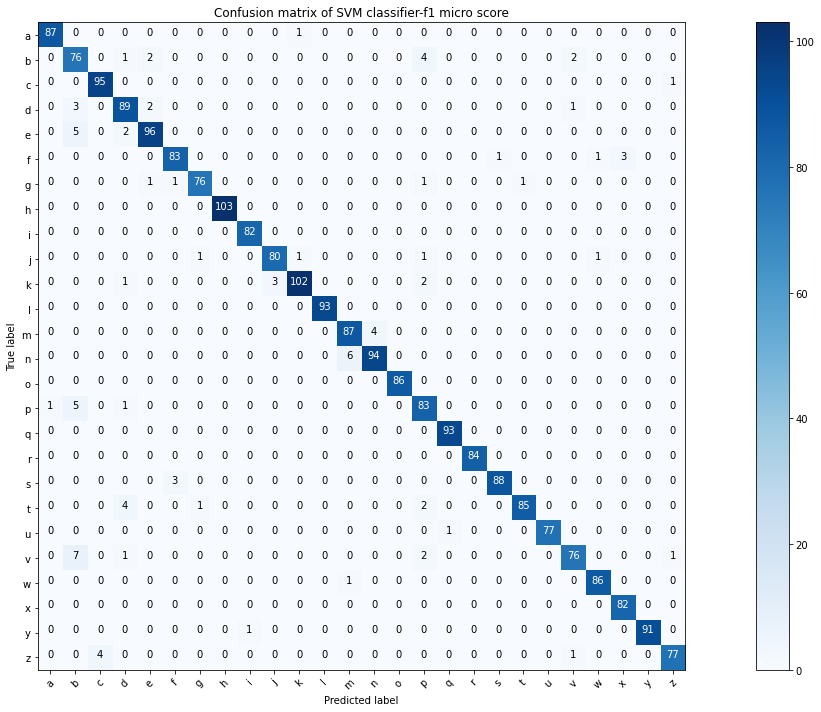

In [ ]:
cnf_matrix = confusion_matrix(y_test, preds_svm_best_micro)
plot_confusion_matrix(cnf_matrix, ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"], 'Confusion matrix of SVM classifier-f1 micro score')

Αποθήκευση των μετρικών (precision,recall,f-score)που προέκυψαν απο τη διαδικασία βελτιστοποίησης.

In [ ]:
estimator_scores_micro['svm'] = [precision_recall_fscore_support(y_test, preds_svm_best_micro, average='micro')[0],
                                 precision_recall_fscore_support(y_test, preds_svm_best_micro, average='micro')[1],
                                 precision_recall_fscore_support(y_test, preds_svm_best_micro, average='micro')[2]]
estimator_scores_macro['svm'] = [precision_recall_fscore_support(y_test, preds_svm_best_macro, average='macro')[0],
                                 precision_recall_fscore_support(y_test, preds_svm_best_macro, average='macro')[1],
                                 precision_recall_fscore_support(y_test, preds_svm_best_macro, average='macro')[2]]
print("Macro")
print(precision_recall_fscore_support(y_test, preds_svm_best_micro, average='macro'))
print("Micro")
print(precision_recall_fscore_support(y_test, preds_svm_best_micro, average='micro'))


Macro
(0.963150082840653, 0.9622246525288844, 0.9623407006894162, None)
Micro
(0.961965811965812, 0.961965811965812, 0.961965811965812, None)


### SVM Linear

In [ ]:
#svm linear

#MACRO
estimator_svm_linear_macro = GridSearchCV(finall_pipes['svc_lin'],parameters_svc_lin,
                             cv=5, scoring='f1_macro', n_jobs=-1, verbose = 10)


estimator_svm_linear_macro.fit(X_train_sample, y_train_sample)


preds_svm_linear_best_macro = estimator_svm_linear_macro.predict(X_test)


print(classification_report(y_test, preds_svm_linear_best_macro))
print(estimator_svm_linear_macro.best_estimator_)
print(estimator_svm_linear_macro.best_params_)
best_estimators_macro['svc_lin'] = estimator_svm_linear_macro.best_estimator_
best_parameters_macro['svc_lin'] = estimator_svm_linear_macro.best_params_

#MICRO
estimator_svm_linear_micro = GridSearchCV(finall_pipes['svc_lin'],parameters_svc_lin,
                             cv=5, scoring='f1_macro', n_jobs=-1, verbose = 10)

estimator_svm_linear_micro.fit(X_train_sample, y_train_sample)

preds_svm_linear_best_micro = estimator_svm_linear_micro.predict(X_test)

print(classification_report(y_test, preds_svm_linear_best_micro))
print(estimator_svm_linear_micro.best_estimator_)
print(estimator_svm_linear_micro.best_params_)
best_estimators_micro['svc_lin'] = estimator_svm_linear_micro.best_estimator_
best_parameters_micro['svc_lin'] = estimator_svm_linear_micro.best_params_




Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1

              precision    recall  f1-score   support

         1.0       0.90      1.00      0.95        88
         2.0       0.79      0.84      0.81        85
         3.0       0.96      0.96      0.96        96
         4.0       0.84      0.92      0.87        95
         5.0       0.89      0.80      0.84       103
         6.0       0.85      0.92      0.89        88
         7.0       0.92      0.88      0.90        80
         8.0       1.00      1.00      1.00       103
         9.0       1.00      1.00      1.00        82
        10.0       0.93      0.94      0.93        84
        11.0       0.95      0.92      0.93       108
        12.0       0.93      1.00      0.96        93
        13.0       0.86      0.96      0.91        91
        14.0       0.93      0.79      0.85       100
        15.0       1.00      0.95      0.98        86
        16.0       0.85      0.81      0.83        90
        17.0       0.98      0.98      0.98        93
        18.0       0.99    

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:  1

              precision    recall  f1-score   support

         1.0       0.92      0.98      0.95        88
         2.0       0.82      0.85      0.83        85
         3.0       0.96      0.95      0.95        96
         4.0       0.85      0.92      0.88        95
         5.0       0.87      0.87      0.87       103
         6.0       0.88      0.92      0.90        88
         7.0       0.88      0.90      0.89        80
         8.0       1.00      1.00      1.00       103
         9.0       0.99      1.00      0.99        82
        10.0       0.93      0.94      0.93        84
        11.0       0.95      0.94      0.94       108
        12.0       0.92      1.00      0.96        93
        13.0       0.89      0.93      0.91        91
        14.0       0.92      0.84      0.88       100
        15.0       1.00      0.95      0.98        86
        16.0       0.89      0.81      0.85        90
        17.0       1.00      0.97      0.98        93
        18.0       0.99    

Ακολούθως χρησιμοποιούμε τα αποτελέσματα σε ολόκληρο το dataset.

In [ ]:
temp_selector = VarianceThreshold(threshold=estimator_svm_linear_macro.best_params_['selector__threshold'])
X_train_copy = temp_selector.fit_transform(X_train)
X_test_copy = temp_selector.transform(X_test)


svm_linear_macro = LinearSVC(C= estimator_svm_linear_macro.best_params_['svc_lin__C'],
          tol = estimator_svm_linear_macro.best_params_['svc_lin__tol'],
          loss =estimator_svm_linear_macro.best_params_['svc_lin__loss'])

t0 = time.time() 
svm_linear_macro.fit(X_train_copy , y_train)
time_train_svm_linear_macro = time.time() - t0

t0 = time.time() 
preds_svm_linear_best_macro = svm_linear_macro.predict(X_test_copy)
time_preds_svm_linear_macro = time.time() - t0

print(classification_report(y_test, preds_svm_linear_best_macro))
print(f1_macro(y_test, preds_svm_linear_best_macro))

              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97        88
         2.0       0.81      0.85      0.83        85
         3.0       0.96      1.00      0.98        96
         4.0       0.90      0.95      0.92        95
         5.0       0.95      0.85      0.90       103
         6.0       0.89      0.94      0.92        88
         7.0       0.89      0.93      0.91        80
         8.0       0.98      0.99      0.99       103
         9.0       0.99      1.00      0.99        82
        10.0       0.93      0.93      0.93        84
        11.0       0.96      0.93      0.94       108
        12.0       0.97      1.00      0.98        93
        13.0       0.93      0.97      0.95        91
        14.0       0.92      0.91      0.91       100
        15.0       1.00      0.99      0.99        86
        16.0       0.87      0.88      0.87        90
        17.0       1.00      0.99      0.99        93
        18.0       1.00    

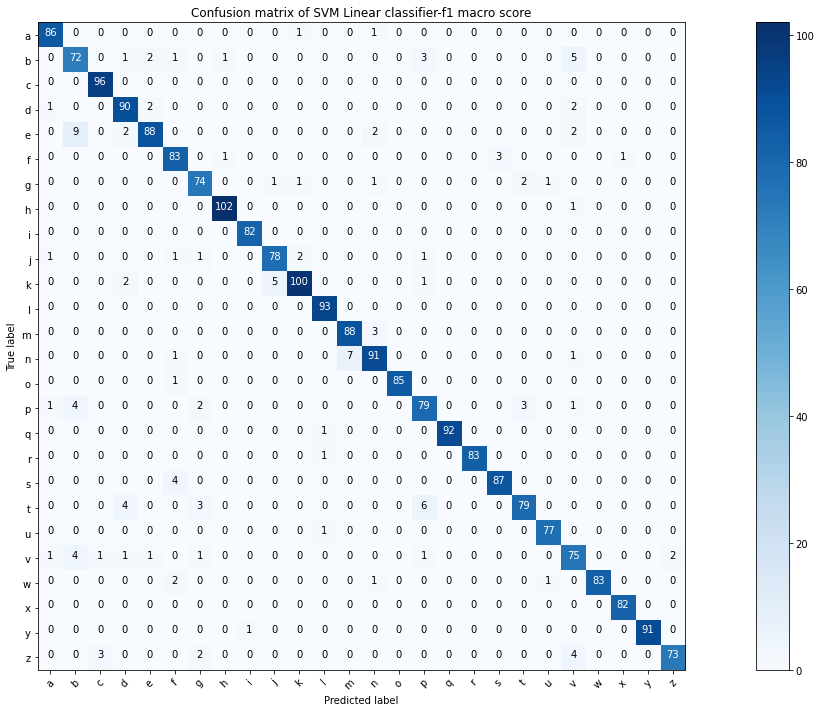

In [ ]:
cnf_matrix = confusion_matrix(y_test, preds_svm_linear_best_macro)
plot_confusion_matrix(cnf_matrix, ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"], 'Confusion matrix of SVM Linear classifier-f1 macro score')

In [ ]:
temp_selector = VarianceThreshold(threshold=estimator_svm_linear_micro.best_params_['selector__threshold'])
X_train_copy = temp_selector.fit_transform(X_train)
X_test_copy = temp_selector.transform(X_test)

svm_linear_micro = LinearSVC(C= estimator_svm_linear_micro.best_params_['svc_lin__C'],
          tol = estimator_svm_linear_micro.best_params_['svc_lin__tol'],
          loss =estimator_svm_linear_micro.best_params_['svc_lin__loss'])


t0 = time.time() 
svm_linear_micro.fit(X_train_copy , y_train)
time_train_svm_linear_micro = time.time() - t0

t0 = time.time() 
preds_svm_linear_best_micro = svm_linear_micro.predict(X_test_copy )
time_preds_svm_linear_micro = time.time() - t0

print(classification_report(y_test, preds_svm_linear_best_micro))
print(f1_micro(y_test, preds_svm_linear_best_micro))

              precision    recall  f1-score   support

         1.0       0.96      0.97      0.96        88
         2.0       0.82      0.86      0.84        85
         3.0       0.96      0.99      0.97        96
         4.0       0.90      0.94      0.92        95
         5.0       0.94      0.91      0.93       103
         6.0       0.89      0.93      0.91        88
         7.0       0.92      0.95      0.93        80
         8.0       0.99      1.00      1.00       103
         9.0       0.99      1.00      0.99        82
        10.0       0.94      0.93      0.93        84
        11.0       0.95      0.93      0.94       108
        12.0       0.95      1.00      0.97        93
        13.0       0.92      0.93      0.93        91
        14.0       0.91      0.91      0.91       100
        15.0       1.00      0.99      0.99        86
        16.0       0.84      0.88      0.86        90
        17.0       1.00      0.99      0.99        93
        18.0       1.00    

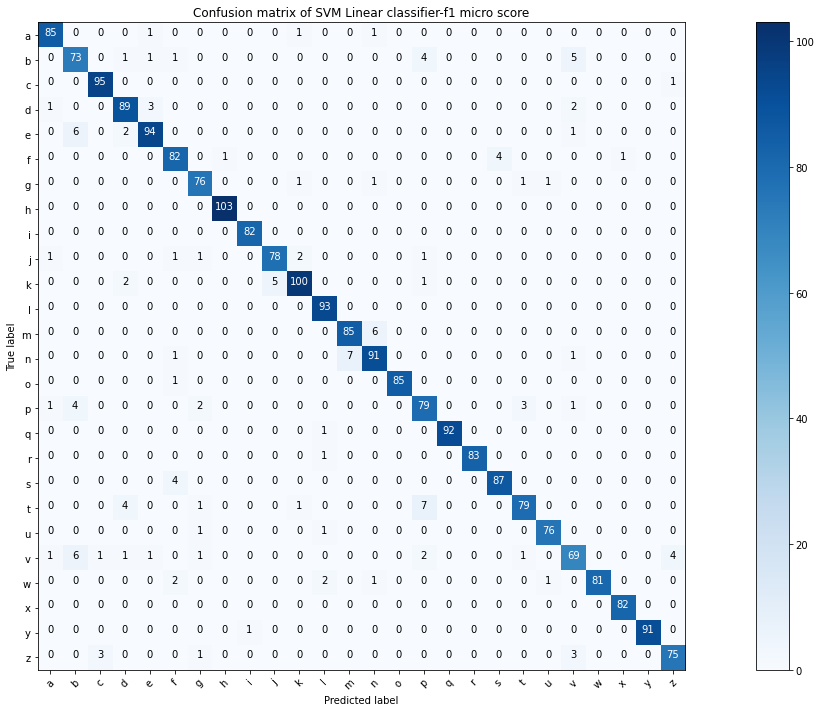

In [ ]:
cnf_matrix = confusion_matrix(y_test, preds_svm_linear_best_micro)
plot_confusion_matrix(cnf_matrix, ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"], 'Confusion matrix of SVM Linear classifier-f1 micro score')

Αποθήκευση των μετρικών (precision,recall,f-score)που προέκυψαν απο τη διαδικασία βελτιστοποίησης.

In [ ]:
estimator_scores_micro['svc_lin'] = [precision_recall_fscore_support(y_test, preds_svm_linear_best_micro, average='micro')[0],
                                     precision_recall_fscore_support(y_test, preds_svm_linear_best_micro, average='micro')[1],
                                     precision_recall_fscore_support(y_test, preds_svm_linear_best_micro, average='micro')[2]]
estimator_scores_macro['svc_lin'] = [precision_recall_fscore_support(y_test, preds_svm_linear_best_macro, average='macro')[0],
                                     precision_recall_fscore_support(y_test, preds_svm_linear_best_macro, average='macro')[1],
                                     precision_recall_fscore_support(y_test, preds_svm_linear_best_macro, average='macro')[2]]

print("Macro")
print(precision_recall_fscore_support(y_test, preds_svm_linear_best_macro, average='macro'))
print("Micro")
print(precision_recall_fscore_support(y_test, preds_svm_linear_best_micro, average='micro'))


Macro
(0.9447433897373204, 0.9444980812733799, 0.9441988349939029, None)
Micro
(0.9423076923076923, 0.9423076923076923, 0.9423076923076923, None)


2. Για το τελικό fit του κάθε ταξινομητή στο σύνολο του training set και για το predict στο test set εκτυπώστε πίνακες με τους χρόνους εκτέλεσης.

In [ ]:
#Times

classifiers = ['GaussianNB','kNN','MLP','SVM', 'SVM - linear']

#Time for Macro
time_train_macro = [time_train_gnb_macro]
time_train_macro.append(time_train_knn_macro)
time_train_macro.append(time_train_mlp_macro)
time_train_macro.append(time_train_svm_macro)
time_train_macro.append(time_train_svm_linear_macro)

time_preds_macro = [time_preds_gnb_macro]
time_preds_macro.append(time_preds_knn_macro)
time_preds_macro.append(time_preds_mlp_macro)
time_preds_macro.append(time_preds_svm_macro)
time_preds_macro.append(time_preds_svm_linear_macro)

#Time for Micro
time_train_micro = [time_train_gnb_micro]
time_train_micro.append(time_train_knn_micro)
time_train_micro.append(time_train_mlp_micro)
time_train_micro.append(time_train_svm_micro)
time_train_micro.append(time_train_svm_linear_micro)


time_preds_micro = [time_preds_gnb_micro]
time_preds_micro.append(time_preds_knn_micro)
time_preds_micro.append(time_preds_mlp_micro)
time_preds_micro.append(time_preds_svm_micro)
time_preds_micro.append(time_preds_svm_linear_micro)

print(time_train_macro)
print(time_preds_macro)
print(time_train_micro)
print(time_preds_micro)

[0.11062169075012207, 0.12699294090270996, 24.484904527664185, 3.3765766620635986, 2.811913013458252]
[0.33916354179382324, 6.148076772689819, 0.013000249862670898, 3.038687229156494, 0.004246711730957031]
[0.07308053970336914, 0.12361526489257812, 24.58442974090576, 3.3182287216186523, 4.01080584526062]
[0.27254366874694824, 6.084419250488281, 0.012380361557006836, 3.0984787940979004, 0.004602909088134766]


Χρόνοι για fit στο train και predict στο test set, με average = macro

In [ ]:
classes = ['GNB','KNN','MLP','SVM','SVM - linear']
data_time = {
            'Training Time': time_train_macro,        
            'Prediction Time': time_preds_macro}

df_time = pd.DataFrame(data_time, index = classifiers,columns = ['Training Time','Prediction Time'])
df_time

,Training Time,Prediction Time
GaussianNB,0.110622,0.339164
kNN,0.126993,6.148077
MLP,24.484905,0.013000
SVM,3.376577,3.038687
SVM - linear,2.811913,0.004247


Χρόνοι για fit στο train και predict στο test set, με average = micro

In [ ]:
print("Χρόνοι για fit και train για average = micro")
classes = ['GNB','KNN','MLP','SVM','SVM - linear']
data_time = {
            'Training Time': time_train_micro,        
            'Prediction Time': time_preds_micro}

df_time = pd.DataFrame(data_time, index = classes,columns = ['Training Time','Prediction Time'])
df_time

Χρόνοι για fit και train για average = micro


,Training Time,Prediction Time
GNB,0.073081,0.272544
KNN,0.123615,6.084419
MLP,24.584430,0.012380
SVM,3.318229,3.098479
SVM - linear,4.010806,0.004603


3. Για κάθε averaged metric, εκτυπώστε bar plot σύγκρισης με τις τιμές του συγκεκριμένου f1 για όλους τους classifiers.



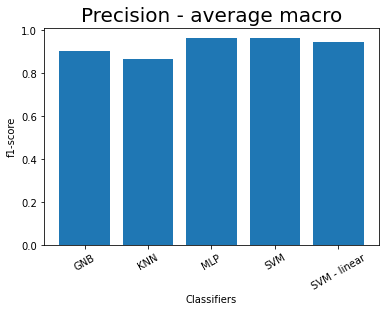

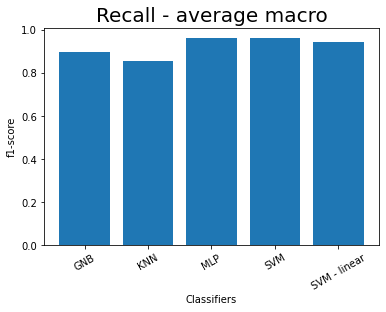

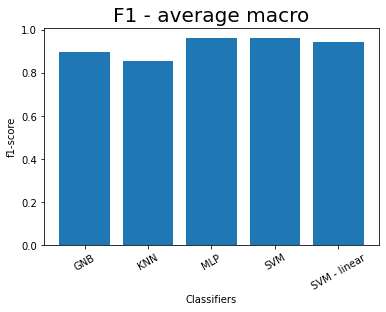

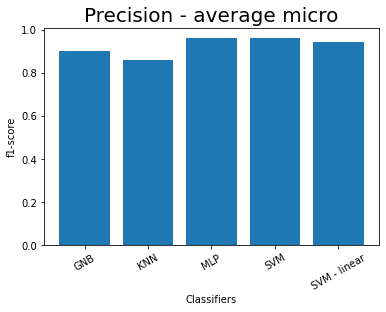

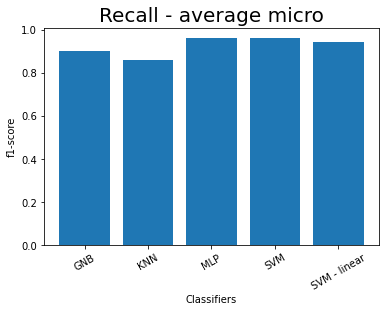

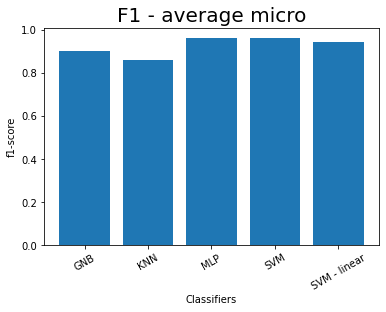

In [ ]:
#Bar plots
name = ['kNN','gnb','mlp','svm','svc_lin']
precision_scores_macro = []
recall_scores_macro = []
f1_scores_macro = []
precision_scores_micro = []
recall_scores_micro = []
f1_scores_micro = []

for i in name:
    precision_scores_macro.append(estimator_scores_macro[i][0])
    recall_scores_macro.append(estimator_scores_macro[i][1])
    f1_scores_macro.append(estimator_scores_macro[i][2])
    
    precision_scores_micro.append(estimator_scores_micro[i][0])
    recall_scores_micro.append(estimator_scores_micro[i][1])
    f1_scores_micro.append(estimator_scores_micro[i][2])

plot_bar(classes, precision_scores_macro, 'Precision - average macro')
plot_bar(classes, recall_scores_macro, 'Recall - average macro')
plot_bar(classes, f1_scores_macro, 'F1 - average macro')

plot_bar(classes, precision_scores_micro, 'Precision - average micro')
plot_bar(classes, recall_scores_micro, 'Recall - average micro')
plot_bar(classes, f1_scores_micro, 'F1 - average micro')


4. Τυπώστε πίνακα με τη μεταβολή της επίδοσης των ταξινομητών πριν και μετά τη βελτιστοποίησή τους.

In [ ]:
print("f1 score-macro average")
f1_macro_list2 = []

f1_macro_list2.append(f1_macro(y_test, preds_gnb_best_macro))
f1_macro_list2.append(f1_macro(y_test, preds_knn_best_macro))
f1_macro_list2.append(f1_macro(y_test, preds_mlp_best_macro))
f1_macro_list2.append(f1_macro(y_test, preds_svm_best_macro))
f1_macro_list2.append(f1_macro(y_test, preds_svm_linear_best_macro))


    
data_macro = {'Before': f1_macro_list1[2:],
             'After':f1_macro_list2}

df_macro = pd.DataFrame(data_macro, index = classes,columns = ['Before','After'])
df_macro

f1 score-macro average


,Before,After
GNB,0.797262,0.856183
KNN,0.867732,0.897660
MLP,0.950707,0.960957
SVM,0.954752,0.962350
SVM - linear,0.942643,0.944199


In [ ]:
print("f1 score-micro average")
f1_micro_list2 = []
f1_micro_list2.append(f1_micro(y_test, preds_gnb_best_micro))
f1_micro_list2.append(f1_micro(y_test, preds_knn_best_micro))
f1_micro_list2.append(f1_micro(y_test, preds_mlp_best_micro))
f1_micro_list2.append(f1_micro(y_test, preds_svm_best_micro))
f1_micro_list2.append(f1_micro(y_test, preds_svm_linear_best_micro))


    
data_micro = {'Before': f1_micro_list1[2:],
             'After':f1_micro_list2}

df_micro = pd.DataFrame(data_micro, index = classes,columns = ['Before','After'])
df_micro

f1 score-micro average


,Before,After
GNB,0.807265,0.858120
KNN,0.866667,0.901709
MLP,0.950427,0.960256
SVM,0.954274,0.961966
SVM - linear,0.942735,0.942308


5. Σχολιάστε τα αποτελέσματα των plots και των τιμών precision, recall, f1 των πινάκων σύγχυσης, τη μεταβολή της απόδοσης και τους χρόνους εκτέλεσης.

**Σχολιασμός Αποτελεσμάτων:**

Όπως φαίνεται από τις επιδόσεις των ταξινομητών πριν και μετά την βελτιστοποίηση των υπερπαραμέτρων, υπάρχει μικρή αύξηση στο accuracy τους.
Παρατηρούμε ότι μετά τη βελτιστοποίηση των υπερπαραμέτρων στον **kNN** έχουμε μία αύξηση της επιτυχίας ταξινόμησης της τάξης του **3%** (micro και macro), ανεβάζοντας έτσι το accuracy του στο **90%**, ποσοστό πολύ ικανοποιητικό. Όπως βλέπουμε και στον πίνακα σύγχησης έχουμε ακόμα περισσότερα δείγματα στην κύρια διαγώνιο.
<br>Ο **MLP** μετά τη βελτιστοποίηση, παρουσίασε μικρή αύξηση στο,precision,recall και accuracy του, με f-scores **96%**. Η βελτίωση του ήταν της τάξης του **1%.** Αποτέλεσμα απολύτως αναμενόμενο, αφού ήταν ήδη πολύ καλός και πριν τη βελτιστοποίηση.
<br>Ο SVM παρουσίασε μια μικρή αύξηση της τάξης του **0.75%** μετά τη βελτιστοποίηση μόνο στο f1-micro score του. Η επίδοση του είναι περίπου η ίδια με του MLP.
<br>Στο γραμμικό SVM βλέπουμε πραγματικά ελάχιστη, συγκριτικά με πριν βελτιστοποίηση της τάξης του **0.2%** μόνο στο f1-macro score.
<br>Σημαντικό είναι να σημειώσουμε ότι ο ταξινομητής **GNB** παρουσίασε την καλύτερη βελτίωση επίδοσης, **5-6%** ,μόνο από τα βήματα που έγιναν στο στάδιο της προεπεξεργασίας των δεδομένων, αφού δεν έχει υπερπαραμέτρους προς βελτίωση.
<br>
<br>
Στους πίνακες σύγχησης παρατηρούμε ότι οι τιμές των κύριων διαγωνίων (TPs) έχουν αυξηθεί κατά λίγο, και οι τιμές εκτός κύριας διαγωνίου έχουν μειωθεί, γεγονός που φανερώνει ότι έχουμε καλύτερες επιδόσεις recall και precision, με το φαινόμενο αυτό να είναι πιο αισθητό στον classifier GNB, καθώς στους υπόλοιπους ταξινομητές οι διαφορές ήταν ελάχιστες εώς ασήμαντες.

Σχετικά με τους χρόνους που χρειάζονται οι ταξινομητές μας:<br>
Παρατηρούμε ότι ο kNN χρειάζεται πολύ μεγαλύτερο χρόνο πρόβλεψης από τους υπόλοιπους. Αυτό συμβαίνει διότι στον kNN για να ταξινομήσουμε ένα νέο δείγμα στην φάση test, πρέπει να συγκρίνουμε την απόστασή του με κάθε δείγμα του train set. Αυτό σημαίνει ότι για την ταξινόμηση είναι απαραίτητα όλα τα δείγματα εκπαίδευσης. Για τους υπόλοιπους ταξινομητές οι χρόνοι πρόβλεψης είναι πολύ μικροί με εξαίρεση τον SVM που εξακολουθεί όμως να είναι πολύ πιο γρήγορος από τον kNN.

Όσον αφορά τους χρόνους εκπαίδευσης, παρατηρούμε ότι ο GNB και ο kNN δεν απαιτούν ιδιαίτερο χρόνο εκπαίδευσης. Ο MLP χρειάζεται περισσότερο χρόνο λόγω των πολλών εποχών και των πολλών νευρώνων. Στο dataset μας παρατηρούμε ότι ο SVM χρειάζεται λιγότερο χρόνο εκπαίδευσης από τον SVM Linear.
**Παρατήρηση:** Οι τιμές που προκύπτουν για τους χρόνους εκπαίδευσης των ταξινομητών μας προέκυψαν τόσο μικρές λόγω του ότι για τους MLP και SVM χρειάστηκε να προηγηθεί δειγματοληψία για το gridsearch λόγω του μεγάλου χρόνου ολοκλήρωσης του. Όπότε παίρνουν τις βέλτιστες παραμέτρους έτοιμες από πριν.